# Project : Real estate market in Bangladesh (exploratory analysis)

<span id="toc"></span>

## Table of Contents

1. [Introduction](#intro)
1. [Preliminary Data Wrangling](#wrangling)
1. [Exploratory Data Analysis](#eda)
1. [Conclusions](#conclusion)

[TOC](#toc)

## Introduction
We are going to investigate scrapped properties datasets in order to gain insights on Bangladesh's real estate market. The goal is to build an intuition on the collected data, and prepare a foundation for our model building stage. In particular, we will be interested in the following questions:
1. [Distribution of properties per city](#properties-vs-cities) (Interpretation [here](#properties-vs-cities-interpretation)) (Group 04)
1. [Distribution of properties per type (shop, apartment, ...)](#properties-vs-types) (Interpretation [here](#properties-vs-types-interpretation)) (Group 04)
1. [Distribution of properties per nature (residential, commercial)](#properties-vs-natures) (Interpretation [here](#properties-vs-natures-interpretation))
1. [Distribution of property price per type (shop, apartment, ...)](#prices-vs-types) (Interpretation [here](#prices-vs-types-interpretation)) (Group 04)
1. [Distribution of property price per nature (residential, commercial)](#prices-vs-natures) (Interpretation [here](#prices-vs-natures-interpretation)) (Group 04)
1. [Impact of basic facilities (e.g. number of bathrooms or bedrooms) on the prices](#basic-facilities--vs--prices) (Interpretation [here](#basic-facilities--vs--prices--interpretation)) (Group 02)
1. [Impact of facilities (malls, educational institutions, ...) in the vicinity on the prices](#facilities-vs-prices) (Group 02)
1. [Impact of internal amenities (play area, number of car parks, ...) on the prices](#amenities-vs-prices) (Interpretation [here](#amenities-vs-prices--interpretation)) (Group 02)
1. [Is it worth it to be interested in building types (shop, apartment, ...), or is building nature enough to explain the prices ?](#types-vs-prices-worth) (Interpretation [here](#types-vs-prices-worth--interpretation)) (Group 02)
1. [How do property prices fluctuate for same location?](#prices-vs-locations) (Interpretation [here](#prices-vs-locations--interpretation) ) (Group 03)
1. [How do property prices fluctuate for same property size?](#prices--vs--properties-size) (Interpretation [here](#prices--vs--properties-size--interpretation)) (Group 03)
1. [How do property prices fluctuate for same / similar amenities?](#prices-vs-amenities) (Interpretation [here](#prices-vs-amenities-interpretation)) (Group 03)
1. [Which amenities are the more frequent in Residential properties ?](#amenities--vs--residential-properties) (Interpretation [here](#amenities--vs--residential-properties-interpretation)) (Group 03)
1. [Which amenities are the more frequent in Commercial properties ?](#amenities--vs--commercial-properties) (Interpretation [here](#amenities--vs--commercial-properties-interpretation)) (Group 03)
1. [How does the available properties density vary across the country ?](#property-density-variation) (Interpretation [here](#property-density-variation-interpretation)) (Group 05)
1. [How does the density of available properties influence the price?](#property-density-variation--vs--price-variation) (Interpretation [here](#property-density-variation--vs--price-variation--interpretation)) (Group 5)


1. [How are the amenities distributed over locations ?](#yyyy)


> **Report date : May, 2023**     
> **Created by : `Task 03 - EDA`'s Collaborators and (co-)leads**


In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from typing import List, Tuple

%matplotlib inline

<span id="wrangling"></span>
[TOC](#toc)  

## Preliminary Data Wrangling
        

### General Properties                
Our main data come from over 20+ different real estate website (in Bangladesh) which were scrapped. After cleaning and merging them, we were left with 33701 samples for 22 attributes.

Let's load the dataset.

In [2]:
# CSVs folder
merged_data_folder="../../data/Merged_Data"

# Export folder
exported_img_folder="exported/images"

In [3]:
# Load the merged dataset
df = pd.read_csv(f"{merged_data_folder}/cleaned_merged_datasets.csv")
df.head(2).T

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1
area,1185.0,2464.0
building_type,Apartment,Apartment
building_nature,Residential,Residential
image_url,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...
num_bath_rooms,0.0,4.0
num_bed_rooms,3.0,3.0
price,6100000.0,28900000.0
property_description,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,A Vibrant 2464 Sq Ft Residential Flat For Sale...
property_overview,This flat consists of facilities you can think...,Ready to move in somewhere with everything nea...
property_url,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...


In [4]:
df.shape

(33701, 22)

### Structure of the dataset
We have 22 features, which are:
* **area**: the area occupied by the property, in sqft
* **building_type**: the type of the property (shop, apartment, duplex, ...)
* **building_nature**: the nature of the property (residential, commercial)
* **image_url**: the link toward the property's image

TODO: add the other features.

In [5]:
# Structure of the properties dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [6]:
# Check N/A values count for each feature
df.isna().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [7]:
# Check null values count for each feature
df.isnull().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                16436
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     14672
property_overview                        15192
property_url                                22
purpose                                      0
city                                         0
locality                                     0
address                                   5177
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

N/A check and null check are giving the same result, so there is nothing to worry about there underlying content. As for the missing values, we should not worry about them since we don't need them in our EDA.

### Data assessement and cleaning

One thing to take note of is that this dataset has already been cleaned (in Task 02). So we will skip this section.

<span id="eda"></span>

[TOC](#toc)               
## Exploratory Data Analysis

<span id="properties-vs-cities"></span>

[EDA](#eda)  
### 1. Distribution of properties per city 
The goal is to know which cities we can make prediction for, as well as understand the how properties are distributed over those cities.      
This question was explored by Group 04.

In [8]:
# Number of properties per city
properties_per_city = df["city"].value_counts()
properties_per_city

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Rangpur                73
Dinajpur               64
Sylhet                 57
Rajshahi               56
Narayanganj            49
Khulna                 39
Mymensingh              8
Thakurgaon              8
Bogura                  8
Cumilla                 5
Manikganj               4
Barguna                 4
Magura                  4
Narsingdi               4
Chittagong              4
Chandpur                3
Kushtia                 3
Jashore                 3
Moulvibazar             2
Madaripur               2
Noakhali                2
Tangail                 2
Brahmanbaria            2
Nilphamari              2
Habiganj                1
Gopalganj               1
Feni                    1
Bandarban               1
Faridpur                1
Nawabganj               1
Shariatpur              1
Kishoreganj             1
Jamalpur                1
Joypurhat   

Let's plot the result in order to read it better.

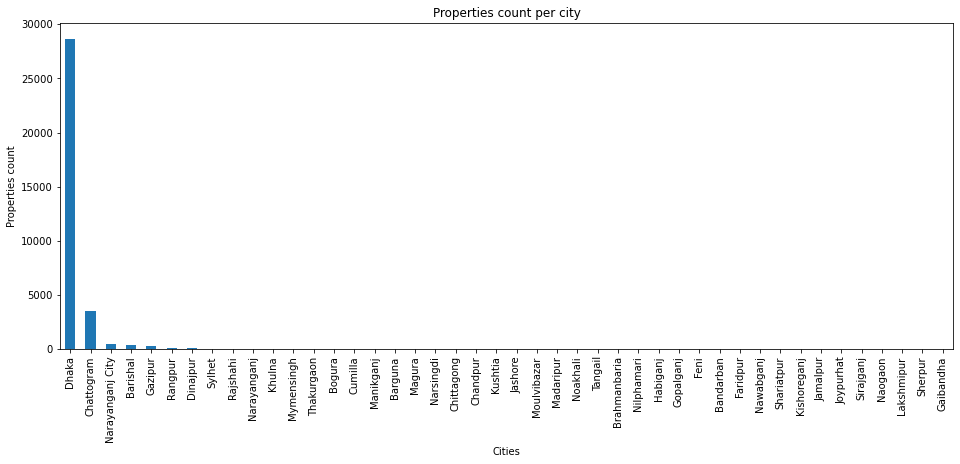

In [9]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

Let's improve the above plot to make it easier to read.

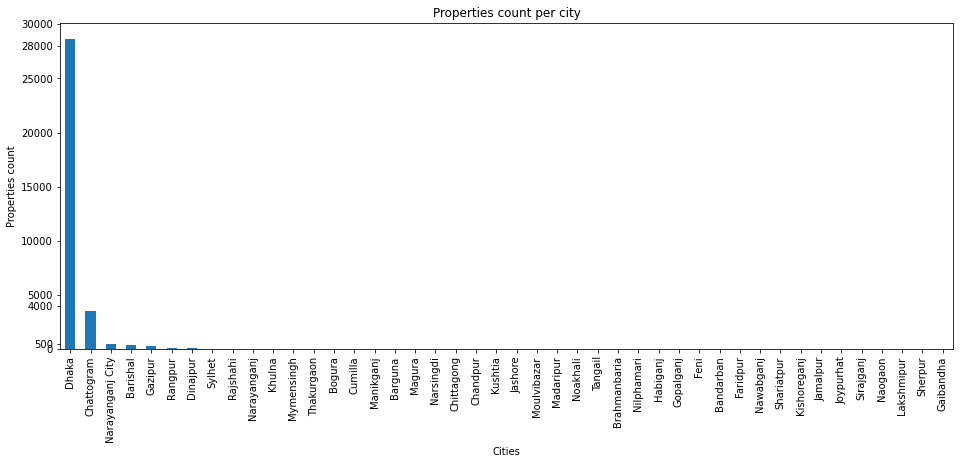

In [10]:
# Plotting properties count per cities
properties_per_city.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 500, 4000, 5000, 10000, 15000, 20000, 25000, 28000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Cities")
plt.ylabel("Properties count")
plt.title("Properties count per city");

<span id="properties-vs-cities-interpretation"></span>

1. Most of our properties are in `Dhaka`, for a total of nearly 28,000 properties. We also have nearly 4000 properties in `Chattogram`.     
1. A negligible amount of properties are in `Narayanganj City`, `Barishal`, `Gazipur`, each of them with a count below 500 properties ..
1. As for the other cities, their properties count is too insignificant.

<br/>

❗ **Recommendation**:
* We are expecting our future models not to be perform well on cities mentioned in (2). We should consider dropping samples with those cities when building models since their low number will make it so that the models will not predict well on them. 
* Cities not part of (1) and (2) should definitively be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-types"></span>

[EDA](#eda)  
### 2. Distribution of properties per type 
We want to understand how properties are ditributed over the different types, namely shop, apartment, building, ...    
This question was explored by Group 04.

Below are the list of the different types of property with have.

In [11]:
# List of properties types
df["building_type"].unique()

array(['Apartment', 'Shop', 'Floor', 'Office', 'Building',
       'Residential Plot', 'Duplex', 'Commercial Plot', 'Warehouse',
       'Factory', 'House', 'Others'], dtype=object)

In [12]:
# Number of properties per type
properties_per_type_count = df["building_type"].value_counts()
properties_per_type_count

Apartment           26940
Office               2266
Building             1412
Shop                  956
Floor                 880
Residential Plot      875
House                 175
Duplex                 84
Commercial Plot        54
Warehouse              29
Factory                19
Others                 11
Name: building_type, dtype: int64

Let's plot the result.

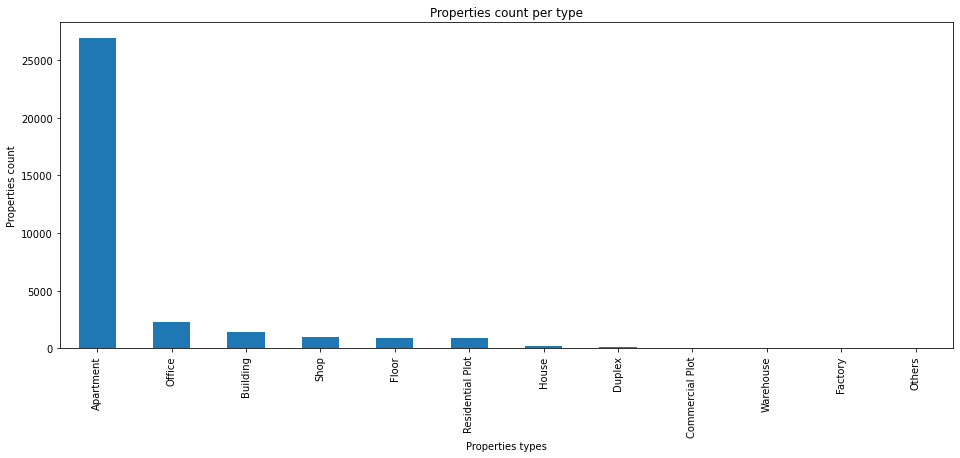

In [13]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Let's improve the above plot to make it easier to read.

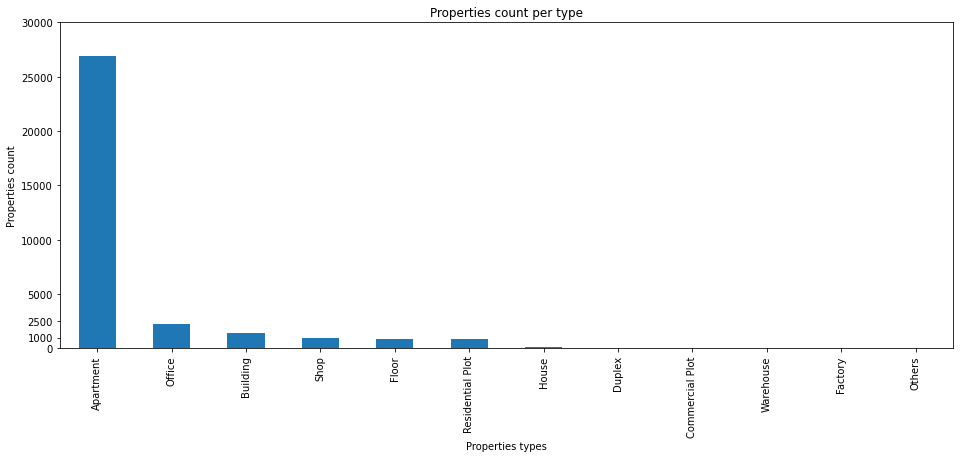

In [14]:
# Plotting the number of properties per type
properties_per_type_count.plot(kind="bar", figsize=(16,6))

y_ticks = [0, 1000, 2500, 5000, 10000, 15000, 20000, 25000, 30000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])


plt.xlabel("Properties types")
plt.ylabel("Properties count")
plt.title("Properties count per type");

Now let's explore the proportion of the property's types in our dataset.

In [15]:
df.shape

(33701, 22)

In [16]:
# Proportion of each type of property
properties_per_type_prop = properties_per_type_count/df.shape[0]*100
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

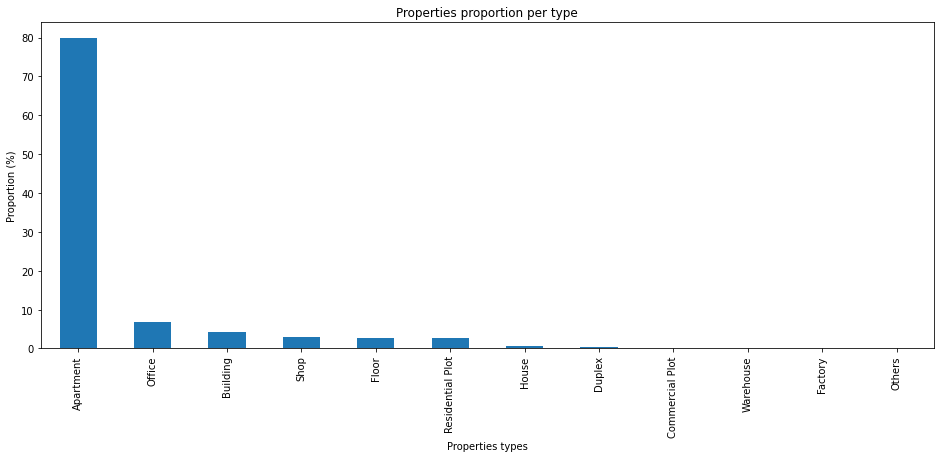

In [17]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

*Note: I didn't use a piechart because the number of elements (property types) is more than 04*

<span id="properties-vs-types-interpretation"></span>

1. Nearly 80% of our properties are `Apartment`, for a total of nearly 27000 samples. We also some `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`, whose number are under 10% of the total dataset; that is to say, their numbers are under 2500. 
1. There are other types of properties, in a very negligible number.


<br/>

❗ **Recommendation**:
* We are expecting our future models to perform well on `Apartment`, and to have and acceptable result for `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`. They are expected to perform poorly on other types of properties.
* Types not part of (1) should be dropped in order to avoid noise in our future models.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="properties-vs-natures"></span>

[EDA](#eda)  
### 3. Distribution of properties per nature 
We want to understand how properties are ditributed over their natures (Residential, Commercial).    


In [18]:
# Number of properties per nature
properties_per_nature_count = df["building_nature"].value_counts()
properties_per_nature_count

Residential    27220
Commercial      6481
Name: building_nature, dtype: int64

Let's plot the result.

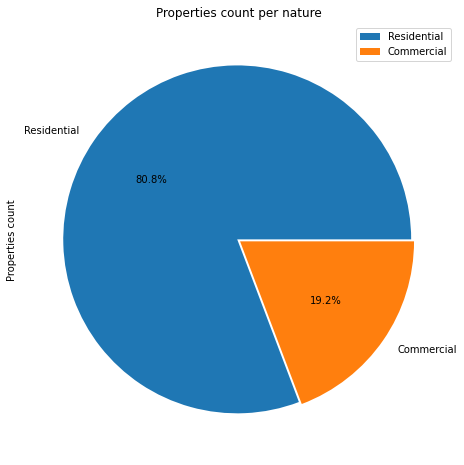

In [19]:
# Plotting the number of properties per nature
properties_per_nature_count.plot(kind="pie",
                                 figsize=(8,8),
                                 autopct='%1.1f%%',
                                 explode=[0.01, 0.01],
                                 legend=True
                                )

# plt.xlabel("Properties natures")
plt.ylabel("Properties count")
plt.title("Properties count per nature");

<span id="properties-vs-natures-interpretation"></span>

81% of our properties are `Residential`, while the rest are `Commercial`.

<br/>

💡 The above plot, as well as the interpretations, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-types"></span>

[EDA](#eda)  
### 4. Distribution of property prices per type 
We want to know the prices are distributed over the different types of properties (shop, apartment, ...).    
This question was explored by Group 04.


In [20]:
# Mean price per building type
mean_price_per_type = df[ ["building_type","purpose","price"] ].groupby(["building_type","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_type.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_type

,building_type,purpose,mean_price
0,Apartment,Rent,6.466751e+06
1,Apartment,Sale,2.671628e+09
2,Building,Rent,8.760356e+07
3,Building,Sale,7.466818e+07
4,Commercial Plot,Rent,2.253519e+05
5,Commercial Plot,Sale,8.602407e+07
6,Duplex,Rent,2.824167e+05
7,Duplex,Sale,4.528889e+07
8,Factory,Rent,3.767947e+05
9,Floor,Rent,4.798500e+05


In [21]:
# Separating the dataframe mean prices according to purpose
mean_price_per_type__rent= mean_price_per_type[mean_price_per_type["purpose"]=="Rent"]
mean_price_per_type__sale= mean_price_per_type[mean_price_per_type["purpose"]=="Sale"]

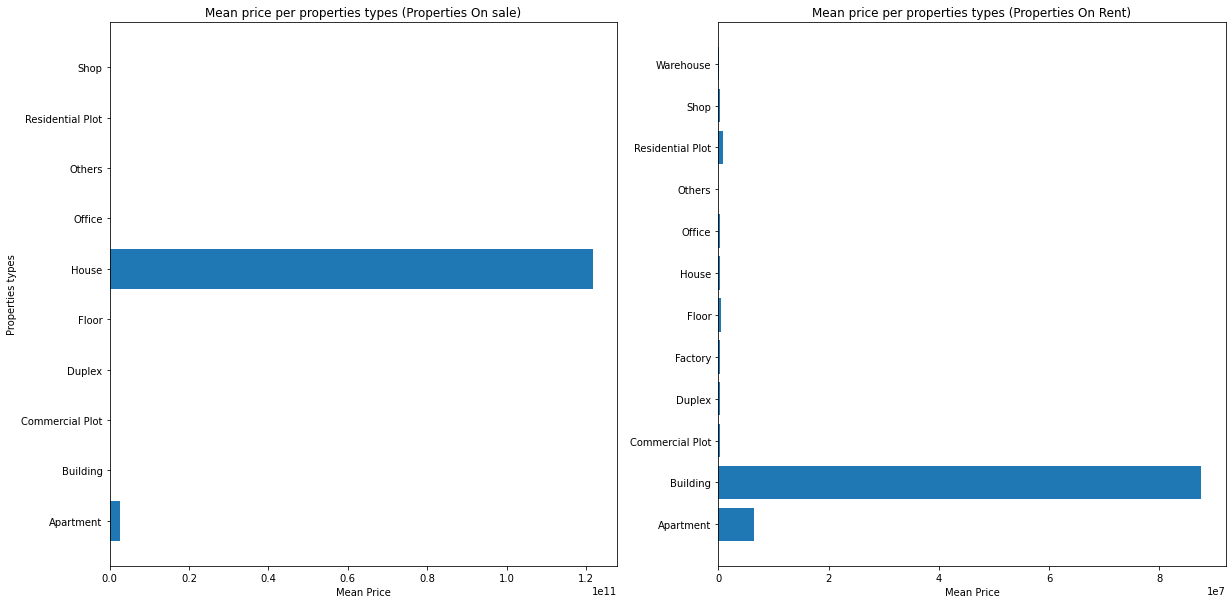

In [22]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")



ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

The above plot is not easily readable. Let's try to improve it by using a log scale on the x-axis

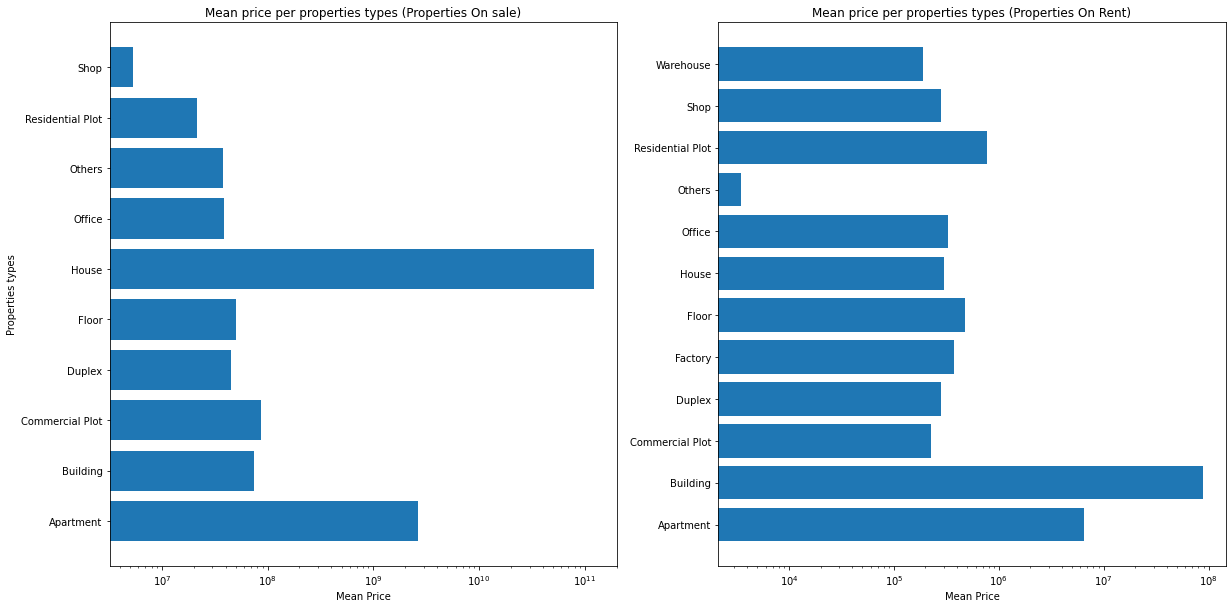

In [23]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_type__sale["mean_price"],y=mean_price_per_type__sale["building_type"])
ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties types (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties types")


ax[1].barh(width=mean_price_per_type__rent["mean_price"],y=mean_price_per_type__rent["building_type"])
ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties types (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])
plt.show()

<span id="prices-vs-types-interpretation"></span>

* For sales:
    * House tend to have higher sale prices, while apartment mean sale price tend to be 60% of house mean sale price
    * Other types of properties sale prices tend to not be for off from each other. Let us take note of Building and Commercial Plot mean prices that are close to each other, which are closely followed by the mean prices of Office, Floor, Duplex. The exception is the Shops, their sale price tend to be the lowest of all properties usual sale prices.
* For rents:
    * Building tend to rented at a higher price than other types of properties, closely followed by Apartment then Residential Plot. Other types of properties tend to have rent prices not far from each other. Let us take note of the fact that there are a type of properties named `Others`, and that they have the lowest mean rent prices.
    

**TODO** : 
- Provide an interpretation for the above plots.
- Try to make the same plot after dividing the prices by 10.000 (price will thus be in thousand)
- Use the same bins on the x-axis of the two plots (mandatory)
- Define order of the values on the y-axis (to make sure that each value is at the same position on the two plots) (mandatory)
- Make sure that each property type is on the y-axis, with a value of zero if necessary (mandatory)
<br/>



<span id="prices-vs-natures"></span>

[EDA](#eda)  
### 5. Distribution of property prices per nature
The goal is to understand how the prices differentiate between `Commercial` and `Residential` areas. For example, we want to know if Commercial properties generally have a higher prices compared to Residential properties, or if it is the other way around.          
This question was explored by Group 04.


In [24]:
# Mean price per building nature
mean_price_per_nature = df[ ["building_nature","purpose","price"] ].groupby(["building_nature","purpose"], as_index=False) \
                                                               .mean()

# Giving more relevant name to column
mean_price_per_nature.rename(columns={
    "price":"mean_price"
}, inplace=True)
    
mean_price_per_nature

,building_nature,purpose,mean_price
0,Commercial,Rent,2.015635e+07
1,Commercial,Sale,2.632762e+07
2,Residential,Rent,6.794873e+06
3,Residential,Sale,2.932132e+09


Let's observe the result on a plot.

In [25]:
# Separating the dataframe mean prices according to purpose
mean_price_per_nature__rent= mean_price_per_nature[mean_price_per_nature["purpose"]=="Rent"]
mean_price_per_nature__sale= mean_price_per_nature[mean_price_per_nature["purpose"]=="Sale"]

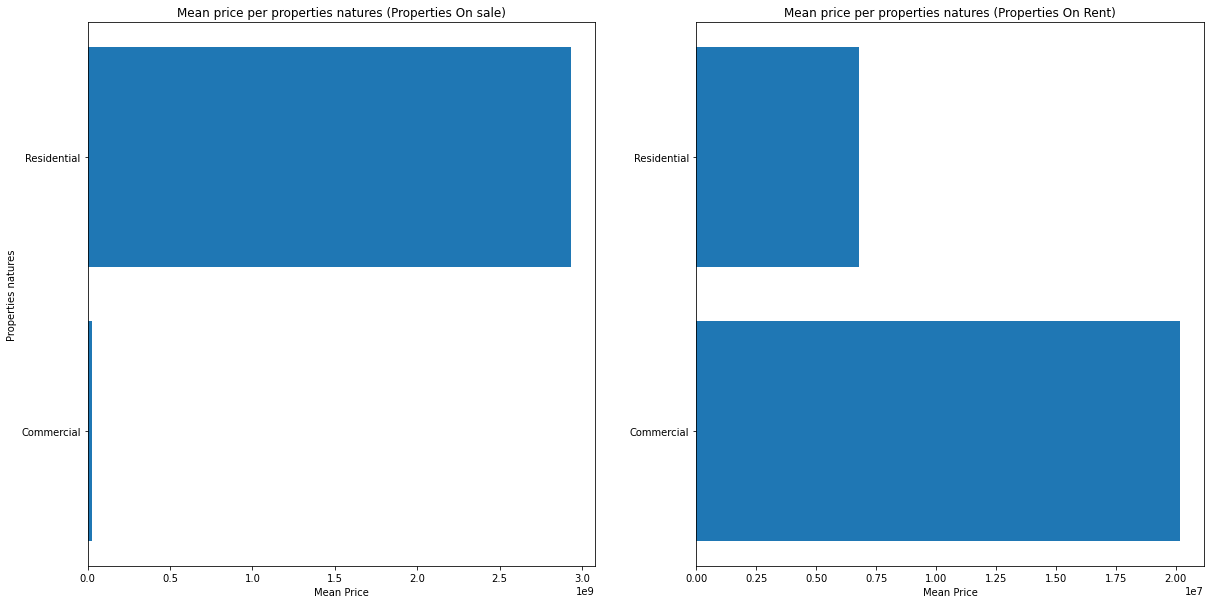

In [26]:
# Plotting the mean prices for sale and rent data
fig, ax = plt.subplots(1,2)

ax[0].barh(width=mean_price_per_nature__sale["mean_price"],y=mean_price_per_nature__sale["building_nature"])
# ax[0].set_xscale("log")
ax[0].set_title("Mean price per properties natures (Properties On sale)")
ax[0].set_xlabel("Mean Price")
ax[0].set_ylabel("Properties natures")


ax[1].barh(width=mean_price_per_nature__rent["mean_price"],y=mean_price_per_nature__rent["building_nature"])
# ax[1].set_xscale("log")
ax[1].set_title("Mean price per properties natures (Properties On Rent)")
ax[1].set_xlabel("Mean Price")

fig.set_size_inches([20,10])

# plt.title("Mean price per properties natures")
plt.show()

<span id="properties-vs-natures-interpretation"></span>

TODO:
- provide interpretation for the above plots

Let's us plot the place distribution per purpose (Sale/ Rent).

##### Distribution of prices for properties to rent

In [27]:
# Get the rent prices
rent_prices = df[df["purpose"]=="Rent"]["price"]
rent_prices

18        500000.0
10855    1213000.0
10856     210000.0
10857     126000.0
10858     360000.0
           ...    
33696        110.0
33697        100.0
33698        120.0
33699        120.0
33700         70.0
Name: price, Length: 20723, dtype: float64

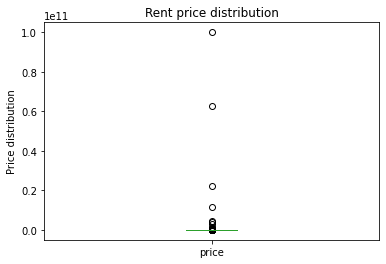

In [28]:
# Price distribution for Rent
rent_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

Let's zoom-in the relevant part of our x-axis.

In [29]:
# 0.2 * 1e11

In [30]:
rent_prices.describe()

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
max      1.000000e+11
Name: price, dtype: float64

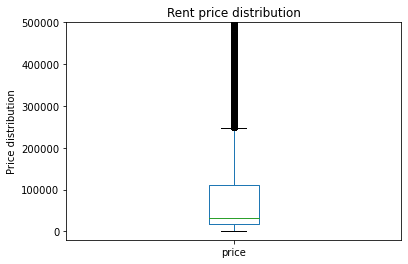

In [31]:
# Price distribution for Rent
rent_prices.plot(kind="box")

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

We are going to update the y-ticks value in order to make the plot easier to read.

In [32]:
# Meadian price
rent_prices.median()

33000.0

In [33]:
# Min price
rent_prices.min()

0.0

In [34]:
# Mean price
rent_prices.min()

0.0

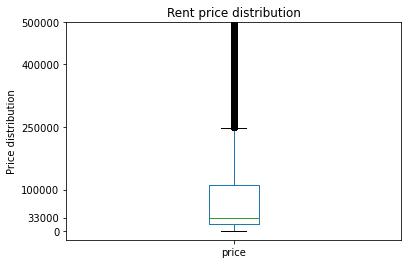

In [35]:
# Price distribution for Rent
rent_prices.plot(kind="box")

y_ticks = [0, 33000, 100000, 250000, 400000,500000]

yticks= {
    "values":y_ticks,
    "labels":y_ticks
}
# plt.xticks(rotation=90)
plt.yticks(yticks["values"], yticks["labels"])

plt.ylim(-2*1e4, 0.5 * 1e6)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Rent price distribution");

TODO:
- Provide interpretation for the above plot

##### Distribution of prices for properties to sale

In [36]:
# Get the sale prices
sale_prices = df[df["purpose"]=="Sale"]["price"]
sale_prices

0         6100000.0
1        28900000.0
2         7500000.0
3        20000000.0
4        10800000.0
            ...    
32300    12200000.0
32316     1300000.0
32317      140000.0
32319    11000000.0
32321      750000.0
Name: price, Length: 12978, dtype: float64

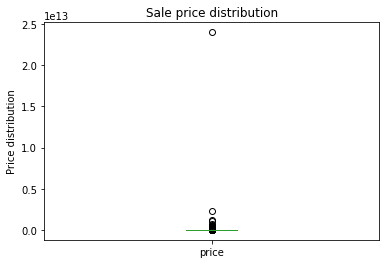

In [37]:
# Price distribution for Rent
sale_prices.plot(kind="box")

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

Let's zoom-in the relevant part of our x-axis.

In [38]:
sale_prices.describe()

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

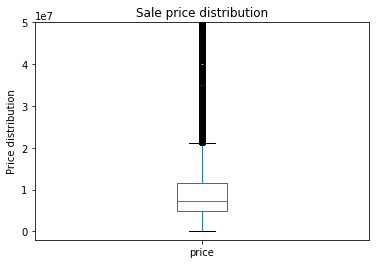

In [39]:
# Price distribution for Sale
sale_prices.plot(kind="box")

plt.ylim(-2*1e6, 0.5 * 1e8)

# plt.xlabel("Departure delay (in minutes)")
plt.ylabel("Price distribution")
plt.title("Sale price distribution");

TODO: 
- Add interpretation for the above plot.

<span id="basic-facilities--vs--prices"></span>

 
[EDA](#eda)  
### 6. Impact of basic facilities on the prices
We want to know how the basic facilities (e.g. number of baths/rooms, area) on impact the prices.

This question was explored by Group 02.


#### Impact of properties areas on the prices

In [40]:
# Distribution of prices for 'Rent'
percl_price_Rent = df[(df["purpose"] == "Rent")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [41]:
# Distribution of prices for 'Sale'
percl_price_Sale = df[(df["purpose"] == "Sale")]["price"].describe(percentiles=[0.02, .3, .6, .9, 0.95, .99])
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

In [42]:
# Distribution of area for 'Rent'
percl_area_Rent = df[(df["purpose"] == "Rent")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Rent

count    2.072300e+04
mean     4.241257e+03
std      1.555526e+05
min      0.000000e+00
5%       3.000000e+00
30%      1.000000e+03
50%      1.400000e+03
60%      1.650000e+03
90%      3.373000e+03
95%      5.000000e+03
99%      1.200000e+04
max      1.450147e+07
Name: area, dtype: float64

In [43]:
# Distribution of area for 'Sale'
percl_area_Sale = df[(df["purpose"] == "Sale")]["area"].describe(percentiles=[0.05, .3, .6, .9, 0.95, .99])
percl_area_Sale

count     12978.000000
mean       1664.862321
std        3755.222407
min           1.000000
5%          650.000000
30%        1150.000000
50%        1320.000000
60%        1445.000000
90%        2289.300000
95%        3600.000000
99%        7218.216000
max      296600.000000
Name: area, dtype: float64

Let's recall the proportion of each property type in the dataset.

In [44]:
# Proportion of each type of property (%)
properties_per_type_prop

Apartment           79.938281
Office               6.723836
Building             4.189787
Shop                 2.836711
Floor                2.611198
Residential Plot     2.596362
House                0.519272
Duplex               0.249251
Commercial Plot      0.160233
Warehouse            0.086051
Factory              0.056378
Others               0.032640
Name: building_type, dtype: float64

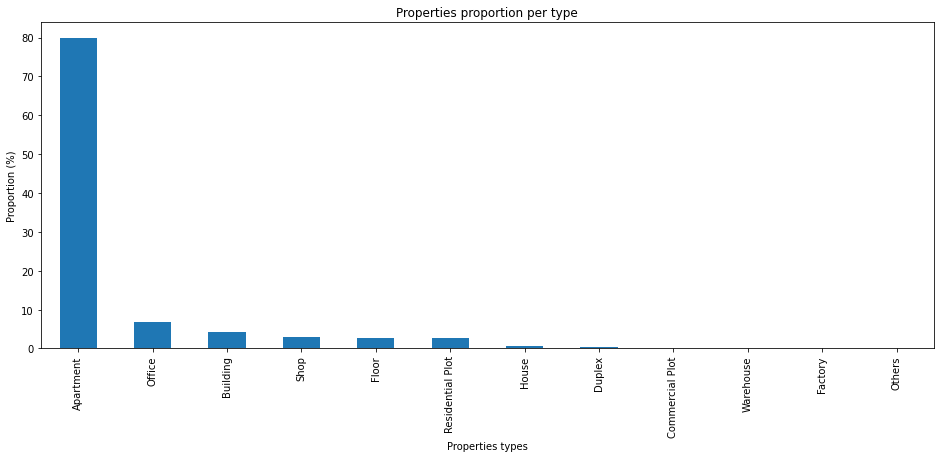

In [45]:
# Plotting the proportion of each type of property
properties_per_type_prop.plot(kind="bar", figsize=(16,6))

plt.xlabel("Properties types")
plt.ylabel("Proportion (%)")
plt.title("Properties proportion per type");

 Close to 80% of the properties are of type 'Apartment'

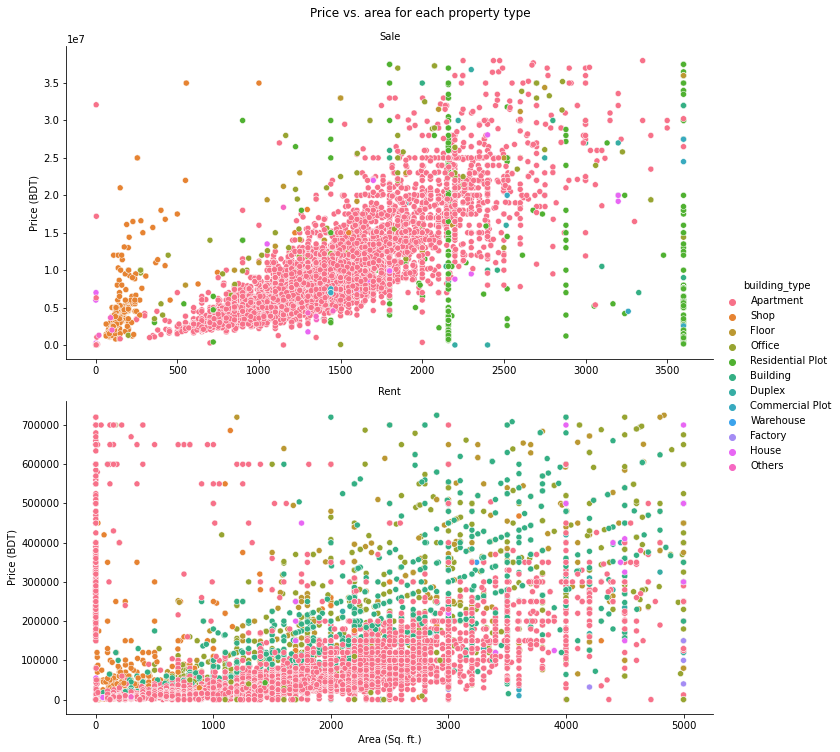

In [46]:
# Prepare / subset the data:
# Get all the data that has price and area outliers removed (= all values above 95 percentile)
data = df[((df.purpose == 'Rent') &
                  (df.area <= percl_area_Rent['95%']) & 
                  (df.price <= percl_price_Rent['95%'])
                 ) | 
                 ((df.purpose == 'Sale') & 
                  (df.area <= percl_area_Sale['95%']) & 
                  (df.price <= percl_price_Sale['95%'])
                 )
                 ]

g = sb.relplot(y="price", x="area", 
                data = data,
                row = "purpose",
                hue = "building_type",
#                 size = "num_bed_rooms",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=5, aspect=2
               )

g.set_titles('{row_name}', fontsize=24)
g.set_axis_labels('Area (Sq. ft.)', 'Price (BDT)')

# g.fig.suptitle('Price vs. area for each property type and purpose', fontsize=12, y=1.02)
g.fig.suptitle('Price vs. area for each property type', fontsize=12, y=1.02)
plt.plot()

# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price-vs-Area-Scatterplot.jpg")

We see that the influence of "area" (size in Sq. ft) on price is more straightforwardly visible for "Aparments" under "Sale" purpose such that there is a linear increase in price with increase in area. For "Aparments" under "Rent" the picture is not that clear--there doesn't seem to be a direct linear relationship. 

Note that Close to 80% of the properties are of type 'Apartment'. This possibly means that we have very little info about other property types.

Furthermore, the range of areas for each type of properties differ. We should take note of this for when we are going to build our future models, because it can means one of two things:
* It is possible that it can have a negative effect on the models performance.
* It is possible that it help the model predict prices better, since the property types seem to be correlated to the prices.

#### Impact of properties number of bathrooms and number of bedrooms on the prices
We want to understand if (and how) the number of bathrooms and number of bedrooms impact the prices

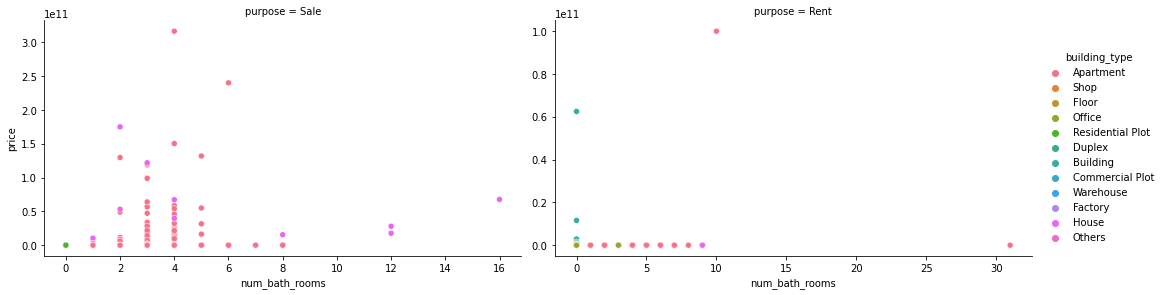

In [47]:
g = sb.relplot(y="price", x="num_bath_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(10, 10)
plt.plot();

TODO: 
- commenting the above plots, and give them a title
- review if possible the labels on the x-axis

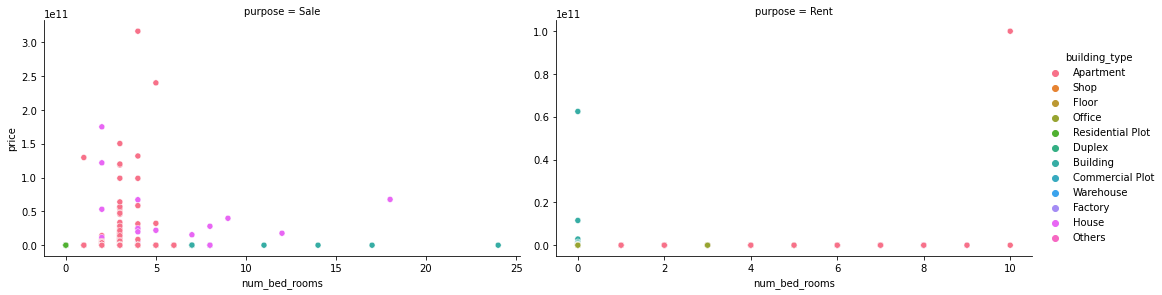

In [48]:
g = sb.relplot(y="price", x="num_bed_rooms", 
                data = df[(((df.purpose == 'Rent') & 
                                      (df.area <= percl_area_Rent['95%'])) | 
                                     ((df.purpose == 'Sale') & 
                                      (df.area <= percl_area_Sale['95%'])
                                     ))],
                col = "purpose",
                hue = "building_type",
                kind="scatter",
                facet_kws={'sharey': False, 'sharex': False},
                height=4, aspect=1.8
               )
# g.fig.set_size_inches(50, 5)
plt.plot();

TODO: 
- commenting the above plots, and give them a title
- review if possible the labels on the x-axis

The individual scatterplots by properties types for "price vs bathrooms count" or "price vs bedrooms count" don't seem very informative, which is perfectly normal since the variable on the x-axis in the above two plots are discrete quantitative variable (not continuous quantitative variable). Boxplots should be more informative for us.

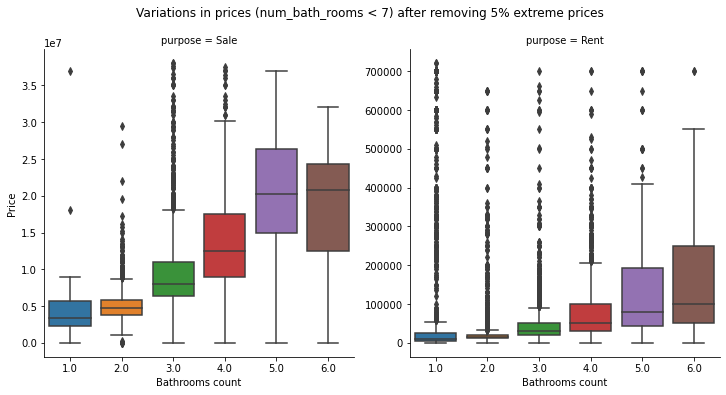

In [49]:
# Plotting the prices variations per number of bathrooms

# plt.figure(figsize=(12, 3))
g = sb.catplot(y="price", x="num_bath_rooms", 
            data = df[(((df.purpose == 'Rent') & 
                                  (df.price <= percl_price_Rent['95%'])
                                 ) |
                                 ((df.purpose == 'Sale') & 
                                  (df.price <= percl_price_Sale['95%'])
                                 )
                                ) &
                                (df.num_bath_rooms > 0) &
                                (df.num_bath_rooms <= 6)
                                   ], 
                kind="box",
               col= "purpose", 
               sharey = False
           )

g.set_axis_labels('Bathrooms count', 'Price')

# g.set_titles('{row_name}', fontsize=24)
# g.set_axis_labels('Bathrooms count', 'Price')

# Add row title
fig = g.fig
# fig.suptitle(f'Row: {row_var}', y=1.05)
fig.suptitle("Variations in prices (num_bath_rooms < 7) after removing 5% extreme prices", y=1.05)

plt.plot()


# Exporting the plot image
g.savefig(f"{exported_img_folder}/Price--vs--bathrooms-count.jpg");

TODO:
- provide interpretation for the above plot
- make a similar plot for Bedrooms count vs price

<span id="basic-facilities--vs--prices--interpretation"></span>


In summary, we can conclude that....       
TODO : provide a summary of the interpretation of:
- area vs price analysis
- bathooms count vs price analysis
- bedrooms count vs price analysis


<br/>

💡 The plots of `area vs price analysis`, `bathooms count vs price analysis`, `bedrooms count vs price analysis`, as well as their interpretation, will be put in our explanatory analysis (or in our presention).

<span id="facilities-vs-prices"></span>
 
[EDA](#eda)  
### 7. Impact of facilities in the vicinity on the prices
This time, we want to understand how facilities in the vicinity, such malls or educational institutions, can impact the prices.     
This question was explored by Group 02.


This question cannot be answered because required infos about those facilities are not available in the dataset.

<span id="amenities-vs-prices"></span>
 
[EDA](#eda)  
### 8.Impact of internal amenities on the prices
We want to know how internal amenities (play area, number of car parks, ...) impact the price.     
This question was explored by Group 02.


We don't have separate info about the internal amenities; so let's plot the impact of all the amenities we have

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [51]:
amenities_vars =  ["relaxation_amenity_count","security_amenity_count","maintenance_or_cleaning_amenity_count",
                  "social_amenity_count","expendable_amenity_count","service_staff_amenity_count",
                   "unclassify_amenity_count"]
amenities_vars

['relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'service_staff_amenity_count',
 'unclassify_amenity_count']

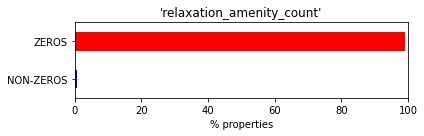

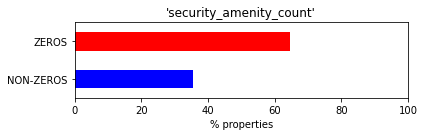

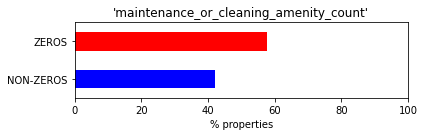

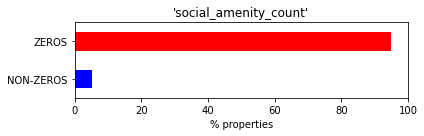

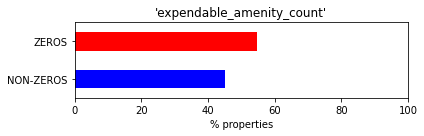

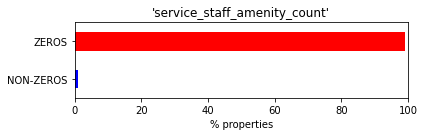

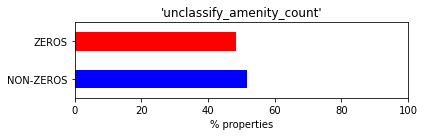

In [52]:
# Plotting how each amenity type variable is distributed over the dataset

for col_name in amenities_vars:
    # col_name = 'security_amenity_count'
    # print(df[col_name].value_counts())

    df_TMP = pd.Series(np.where(df[col_name] == 0, 'ZEROS', 'NON-ZEROS'))
    percentages = (df_TMP.value_counts() / df_TMP.value_counts().sum()) * 100
    
#     print()
#     print("------------------------------------")
#     print(percentages)

    fig, ax = plt.subplots(figsize=(6, 2))
    percentages.sort_index().plot.barh(color=['blue', 'red'])

    # Set x and y axis labels
    plt.xlabel('% properties')
    plt.ylabel('')
    # plt.title(f"'{col_name}': zero vs. non-zero entries")
    plt.title(f"'{col_name}'")
    ax.set_xlim(0, 100)

    plt.tight_layout()
    
#     plt.title("Amenity types variable distribution over the dataset")

    # Show the plot
    plt.show()


TODO:
- comment the above plot.

In [53]:
# Recall Price percentile range for 'Rent'
percl_price_Rent

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
2%       0.000000e+00
30%      2.000000e+04
50%      3.300000e+04
60%      5.000000e+04
90%      3.800000e+05
95%      7.350000e+05
99%      2.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [54]:
# Recall Price percentile range for 'Sale'
percl_price_Sale

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
2%       2.263500e+06
30%      5.500000e+06
50%      7.350000e+06
60%      8.350000e+06
90%      2.100000e+07
95%      3.800000e+07
99%      5.423000e+09
max      2.400000e+13
Name: price, dtype: float64

Now we are going to plot the distribution of price over the count of each amenity type count.

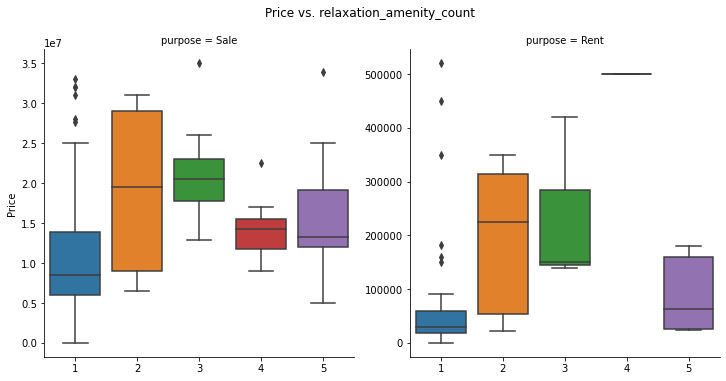

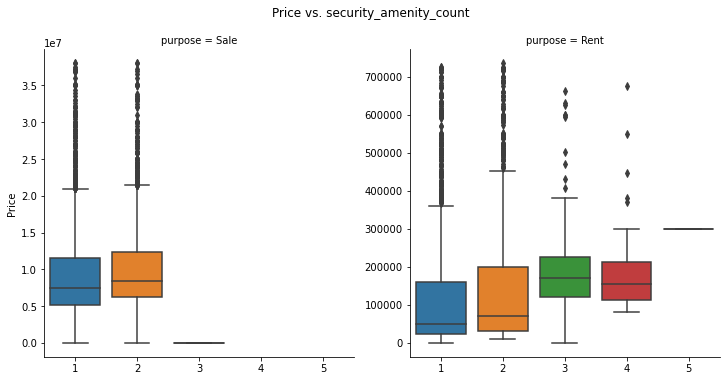

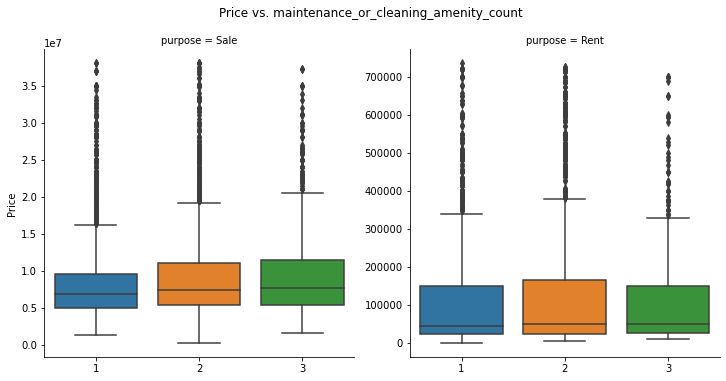

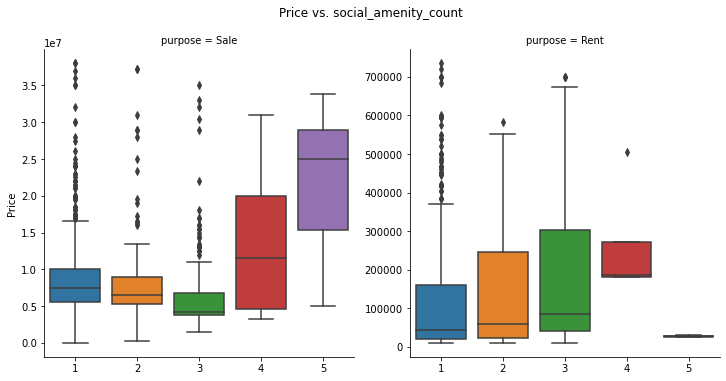

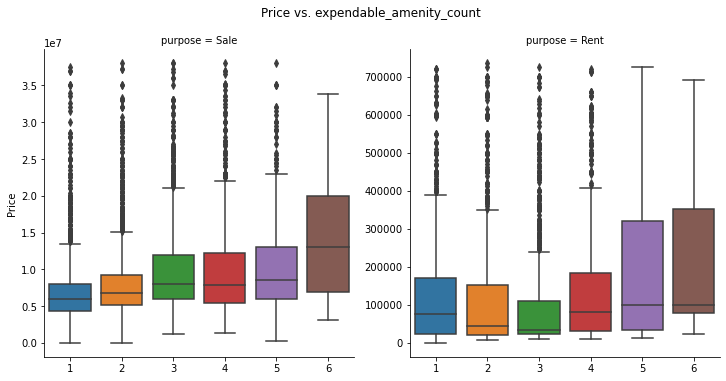

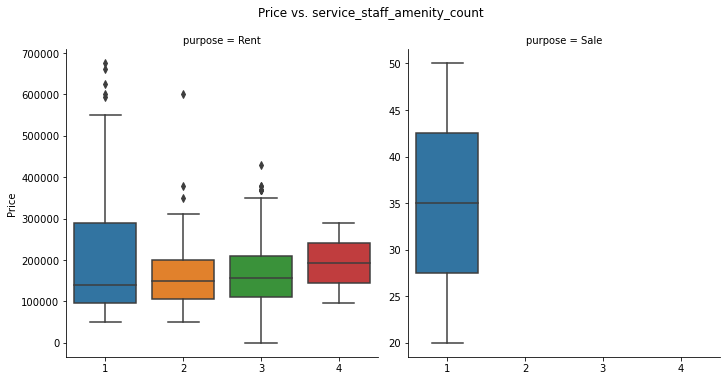

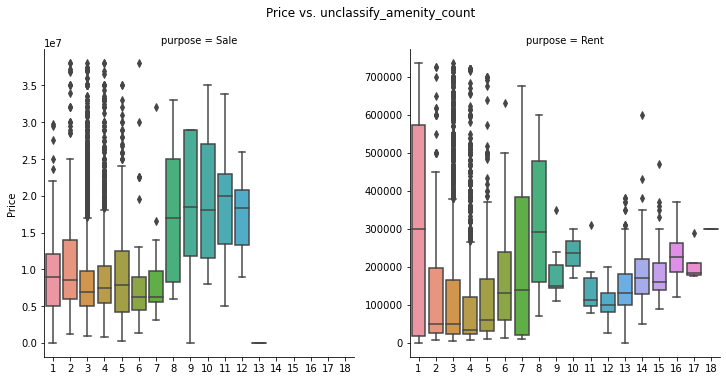

In [55]:
# Take a subset of data such that properties with very hight values (upper 5%tile) are excluded
df_sub = df[(((df.purpose == 'Rent') & (df.price <= percl_price_Rent['95%'])) | 
                    ((df.purpose == 'Sale') & (df.price <= percl_price_Sale['95%']))
                   )]

# Plotting the distribution of price over the count of each amenity type count
for amenity_name in amenities_vars:
    g = sb.catplot(y="price", 
                   x=amenity_name, #"security_amenity_count", 
                    data = df_sub[df_sub[amenity_name] > 0], 
                    kind="box",
                    col= "purpose", 
                    sharey = False
                   )

    g.set_axis_labels('', 'Price')
    # Exporting the plot image
    g.savefig(f"{exported_img_folder}/Price--vs--{amenity_name}-count.jpg");

    # Add row title
    fig = g.fig
    fig.suptitle(f"Price vs. {amenity_name}", y=1.05)

    plt.plot()
    

# Exporting the plot image
# g.savefig(f"{exported_img_folder}/Price--vs--amenity-types-count.jpg");

<span id="amenities-vs-prices--interpretation"></span>

       
TODO : 
- Provide interpretation for the above plot


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="types-vs-prices-worth"></span>
 
[EDA](#eda)  
### 9. Is it worth it to have properties types to explain the prices, or is properties natures enough for that ?
We want to understand if properties natures (Residential/Commercial) are enough to explain the prices or if we also need properties types (shop, apartment, ...) for that. Our end goal is to know if we should drop consider dropping properties types when building our models.      
This question was explored by Group 02.



TODO: Review how this question was answered. We should check/compare how mean prices fluctuate over properties types and over properties natures.

In [56]:
# df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()

In [57]:
# Calculate 'Sale' and 'Rent' means separately and merge

# Mean prices per property types (for sale and rent)
mean_price_per_type__sale = df[df['purpose'] == 'Sale'].groupby('building_type', as_index=False)['price'].mean()
mean_price_per_type__rent = df[df['purpose'] == 'Rent'].groupby('building_type', as_index=False)['price'].mean()


# Merging the above two dataframe
mean_prices_per_type = pd.merge( mean_price_per_type__sale, mean_price_per_type__rent, 
         on='building_type', how='outer', suffixes = ['_sale', '_rent']).fillna(0)

mean_prices_per_type.rename(columns={
    "price_sale":"mean_sale_price",
    "price_rent":"mean_rent_price"
}, inplace=True)

mean_prices_per_type

,building_type,mean_sale_price,mean_rent_price
0,Apartment,2.671628e+09,6.466751e+06
1,Building,7.466818e+07,8.760356e+07
2,Commercial Plot,8.602407e+07,2.253519e+05
3,Duplex,4.528889e+07,2.824167e+05
4,Floor,5.032089e+07,4.798500e+05
5,House,1.216533e+11,3.014254e+05
6,Office,3.868742e+07,3.283976e+05
7,Others,3.818133e+07,3.514000e+03
8,Residential Plot,2.159444e+07,7.715020e+05
9,Shop,5.289379e+06,2.787757e+05


Let us plot the result.

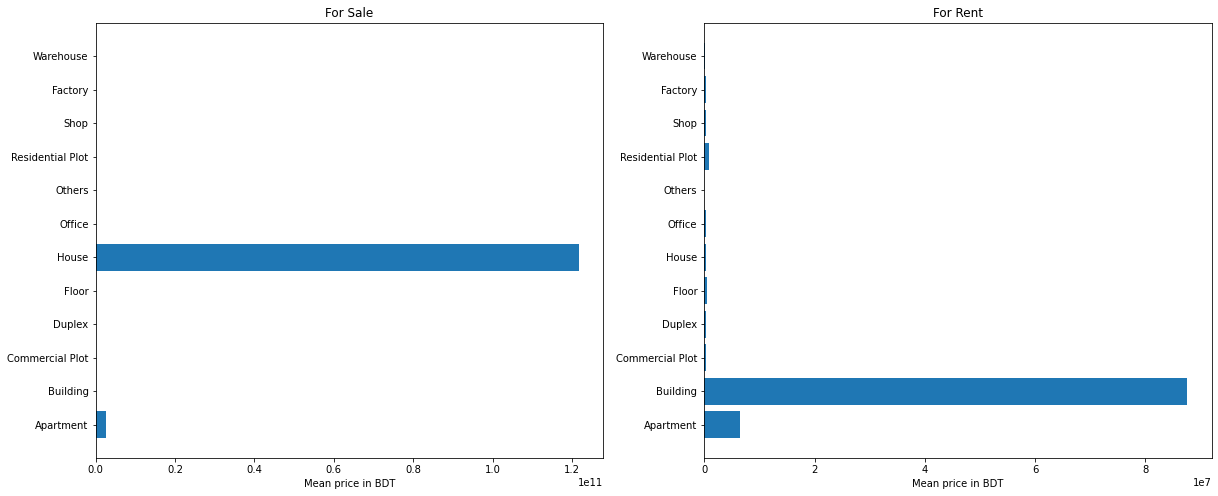

In [58]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
# ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
# ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

We cannot gain to much information from the above plot. Let's improve it by using log scale on the x-axis.

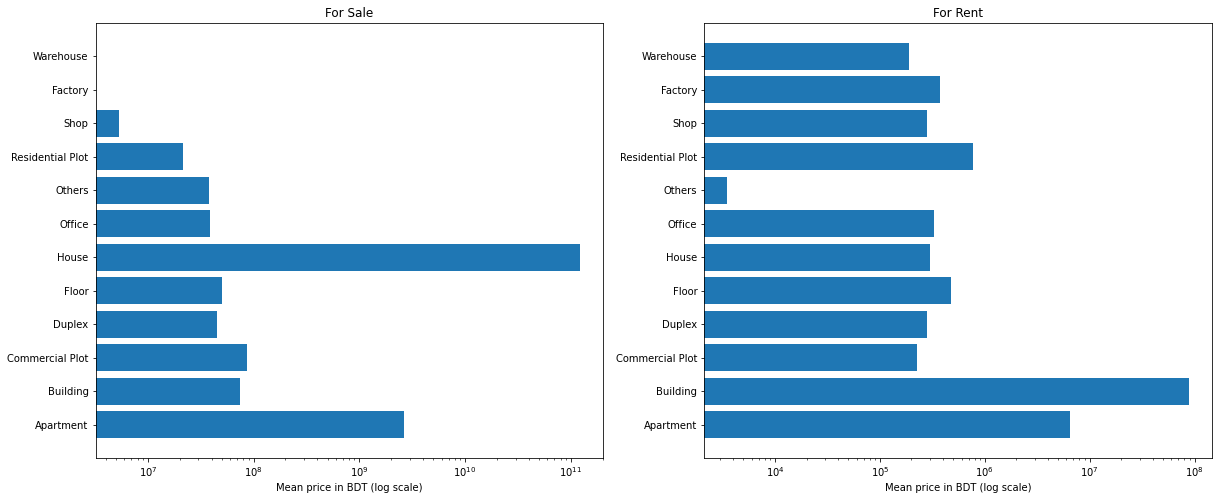

In [59]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_sale_price'])
ax[0].set_title('For Sale')
ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT (log scale)')


# # Second plot
ax[1].barh(mean_prices_per_type['building_type'], mean_prices_per_type['mean_rent_price'])
ax[1].set_title('For Rent')
ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT (log scale)')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

<span id="types-vs-prices-worth--interpretation"></span>

       
TODO : 
- Provide interpretation for the above plot


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-locations"></span>
 
[EDA](#eda)  
### 10. How do property prices fluctuate for same location?
We want to understand how the prices fluctuate for the same location. For this purpose, we will use boxplot on each city.   
This question was explored by Group 03.

In [60]:
# # Mean price per location
# mean_price_per_location = df.groupby("city")["price"].mean()
# mean_price_per_location

In [61]:
# Separating the dataframe prices according to purpose
rent_df = df[df["purpose"]=="Rent"]
sale_df= df[df["purpose"]=="Sale"]
rent_df.shape, sale_df.shape

((20723, 22), (12978, 22))

In [62]:
rent_df.describe()["price"]

count    2.072300e+04
mean     1.048616e+07
std      8.390854e+08
min      0.000000e+00
25%      1.800000e+04
50%      3.300000e+04
75%      1.100000e+05
max      1.000000e+11
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
<ipython-input-63-326ea92c3115>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(min_, max_);


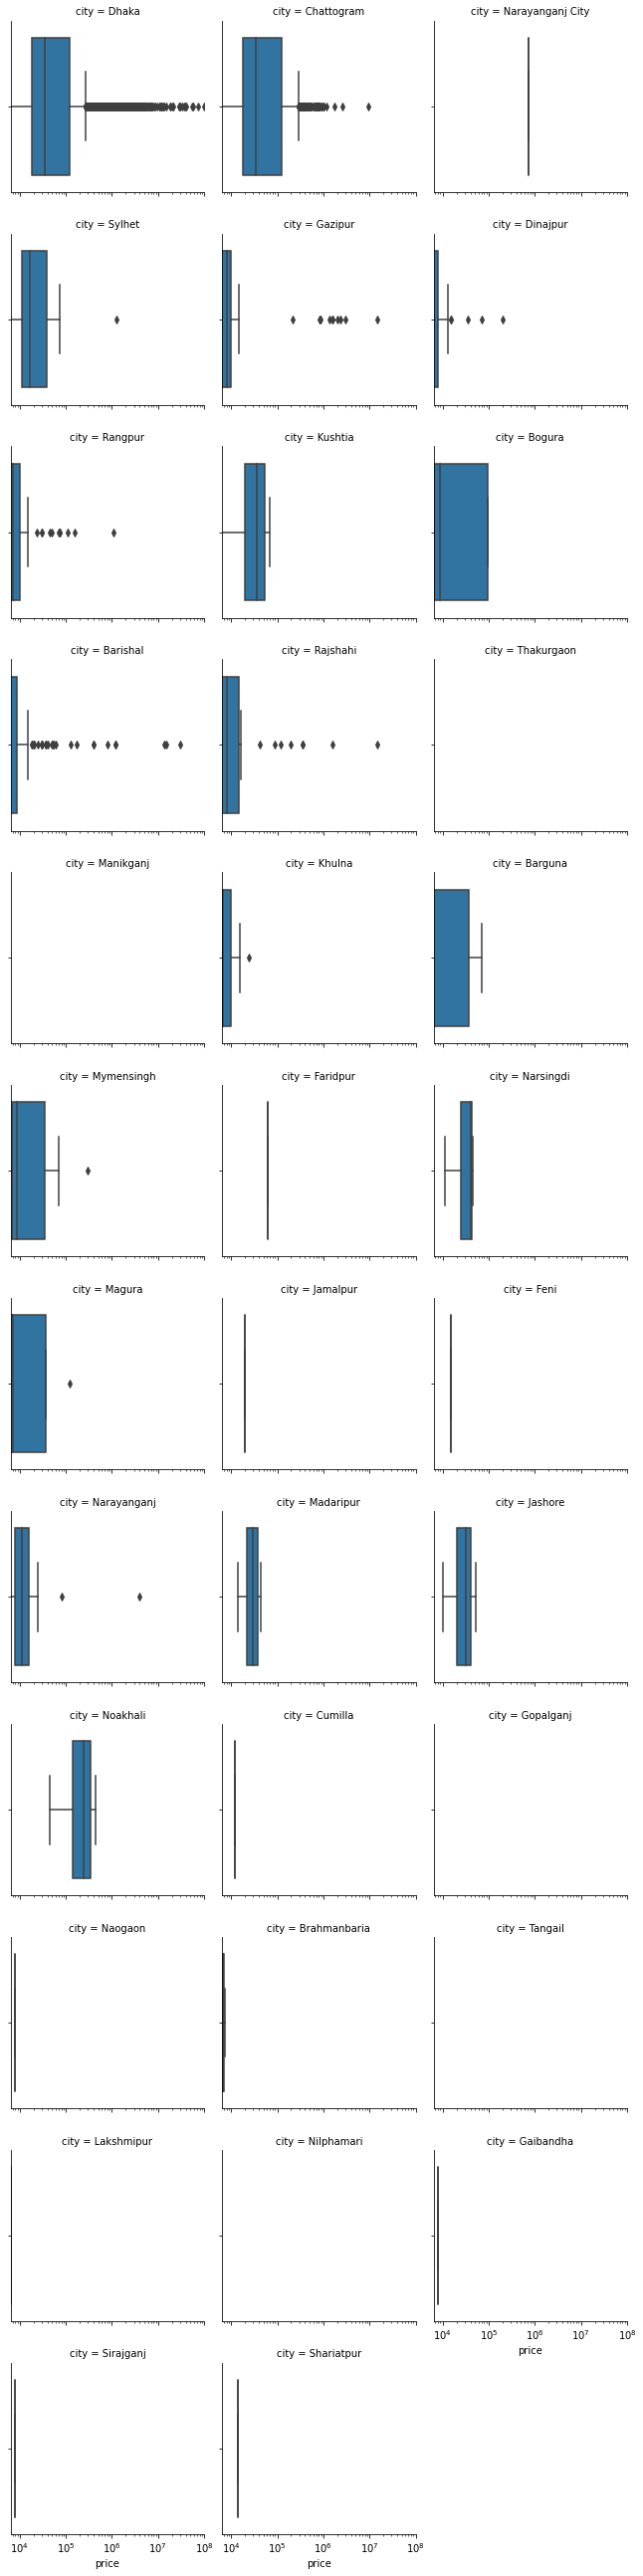

In [63]:
# Distribution of rent prices per cities
g = sb.FacetGrid(data=rent_df, col="city", col_wrap=3)
g.map(sb.boxplot, "price")

plt.xscale("log")

min_ = -8.39*10e8 # 0*0e0 #-1.2e3 +100
max_ = 1*10e7 #np.log10(rent_df.max())+ binsize   

plt.xlim(min_, max_);

TODO: provide the interpretation for the above plot.

In [64]:
sale_df.describe()["price"]

count    1.297800e+04
mean     2.762862e+09
std      2.124047e+11
min      0.000000e+00
25%      5.000000e+06
50%      7.350000e+06
75%      1.150000e+07
max      2.400000e+13
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
<ipython-input-65-39449d28bd6b>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(min_, max_);


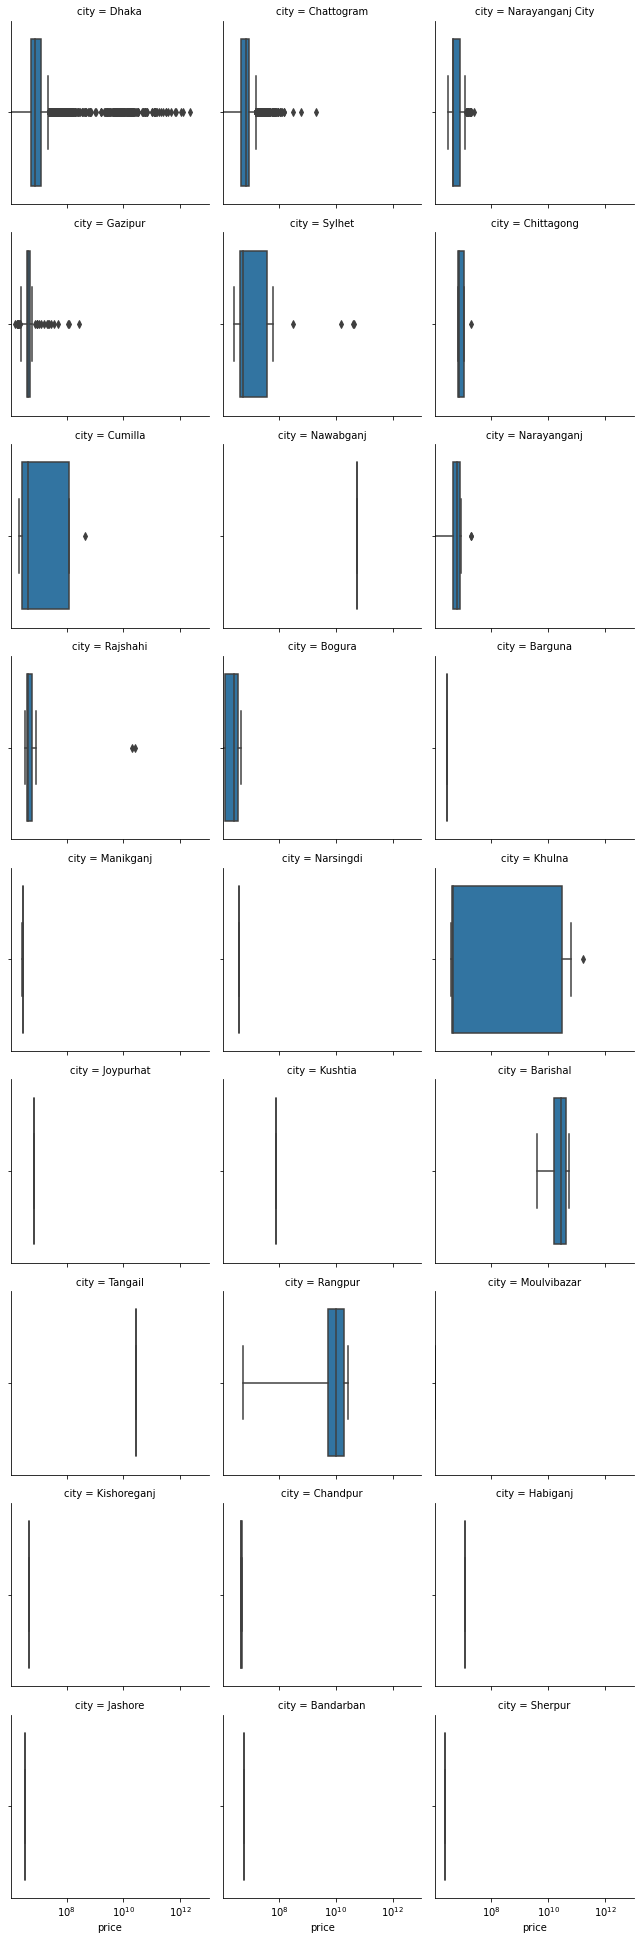

In [65]:
# Distribution of rent prices per cities
g = sb.FacetGrid(data=sale_df, col="city", col_wrap=3)
g.map(sb.boxplot, "price")

plt.xscale("log")

min_ = -4.12*10e11 
max_ = 1*10e12 

plt.xlim(min_, max_);

TODO: provide the interpretation for the above plot.

<span id="prices-vs-locations--interpretation"></span>

       
TODO : 
- Provide a summary of the interpretations for this part


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices--vs--properties-size"></span>

 
[EDA](#eda)  
### 11. How do property prices fluctuate for same property size?
We want to understand how the relationship between prices and property sizes.   
This question was explored by Group 03.

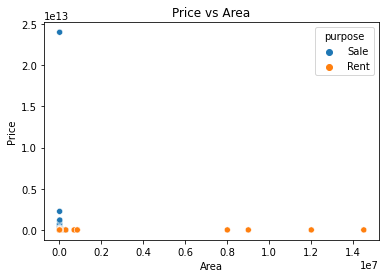

In [66]:
sb.scatterplot(data=df, x="area",y="price", hue="purpose")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area");

Our first remark is the outliers (value over 0.2 over the x-axis and over 0.5 over the y-axis). We will zoom-in the x-axis in order to better see the correlation between our two variables, though there seem to not be none.

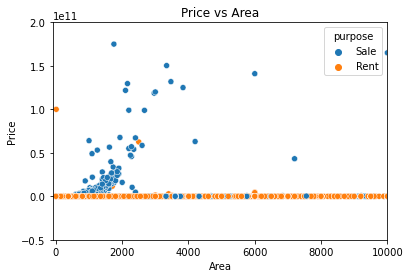

In [67]:
sb.scatterplot(data=df, x="area",y="price", hue="purpose")

plt.xlim(-100, 10000)
plt.ylim(-.5*1e11, .2*1e12) #plt.ylim(-.5*1e11, .5*1e11) #

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area");


<span id="prices--vs--properties-size--interpretation"></span>

We can observe that:
* For sale, there is a very weak linear correlation between price and area. The prices tend to increase until we reach 3500 sqft, after which the prices seem to no more be correlated to the area. 
* For rent, the price is clearly not related to the area.



<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="prices-vs-amenities"></span>

[EDA](#eda)  
### 12. How do property prices fluctuate for same / similar amenities?
We want to understand how similar amenities, grouped together, can impact the prices. We will also use this opportunity to observe the impact of other numercial variables on the prices.   
This question was explored by Group 03.

Let's explore the correlation between those variables.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

In [69]:
numerical_vars = ["area","num_bed_rooms","num_bath_rooms",
                  "relaxation_amenity_count", "security_amenity_count","maintenance_or_cleaning_amenity_count",
                  "social_amenity_count", "expendable_amenity_count","unclassify_amenity_count",
                  "price"]
numerical_vars

['area',
 'num_bed_rooms',
 'num_bath_rooms',
 'relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'unclassify_amenity_count',
 'price']

In [70]:
# Correlation between numerical features
df[numerical_vars].corr()

,area,num_bed_rooms,num_bath_rooms,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,unclassify_amenity_count,price
area,1.000000,0.001957,0.005682,-0.000674,-0.006134,-0.008345,-0.002119,-0.007998,-0.005622,0.000378
num_bed_rooms,0.001957,1.000000,0.495833,0.020519,0.017319,0.011440,-0.046400,0.013382,0.021779,0.026236
num_bath_rooms,0.005682,0.495833,1.000000,-0.008835,-0.171149,-0.291741,-0.092607,-0.255924,-0.231107,0.025625
relaxation_amenity_count,-0.000674,0.020519,-0.008835,1.000000,0.106834,0.073350,0.435223,0.141310,0.174095,-0.000589
security_amenity_count,-0.006134,0.017319,-0.171149,0.106834,1.000000,0.601155,0.241218,0.616629,0.719295,-0.005356
maintenance_or_cleaning_amenity_count,-0.008345,0.011440,-0.291741,0.073350,0.601155,1.000000,0.234086,0.737492,0.615686,-0.006237
social_amenity_count,-0.002119,-0.046400,-0.092607,0.435223,0.241218,0.234086,1.000000,0.271053,0.264927,-0.001603
expendable_amenity_count,-0.007998,0.013382,-0.255924,0.141310,0.616629,0.737492,0.271053,1.000000,0.649144,-0.006176
unclassify_amenity_count,-0.005622,0.021779,-0.231107,0.174095,0.719295,0.615686,0.264927,0.649144,1.000000,-0.006887
price,0.000378,0.026236,0.025625,-0.000589,-0.005356,-0.006237,-0.001603,-0.006176,-0.006887,1.000000


Let's use a heatmap to make interesting relationship easier to locate.

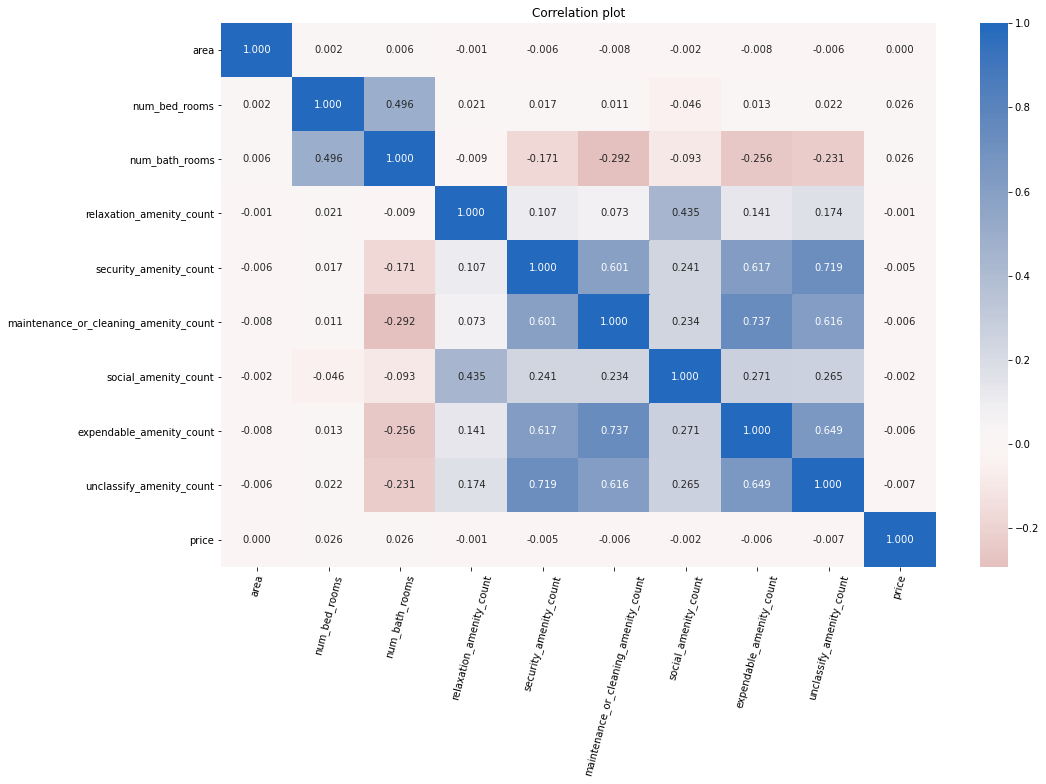

In [71]:
# Correlation plot for the whole dataset
plt.figure(figsize = [16, 10])
sb.heatmap(df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Correlation plot")

plt.xticks(rotation=75);

There doesn't seem to be a relationship between price and the other variables. Let's observe the correlation separatly for each purpose (rent/sale).

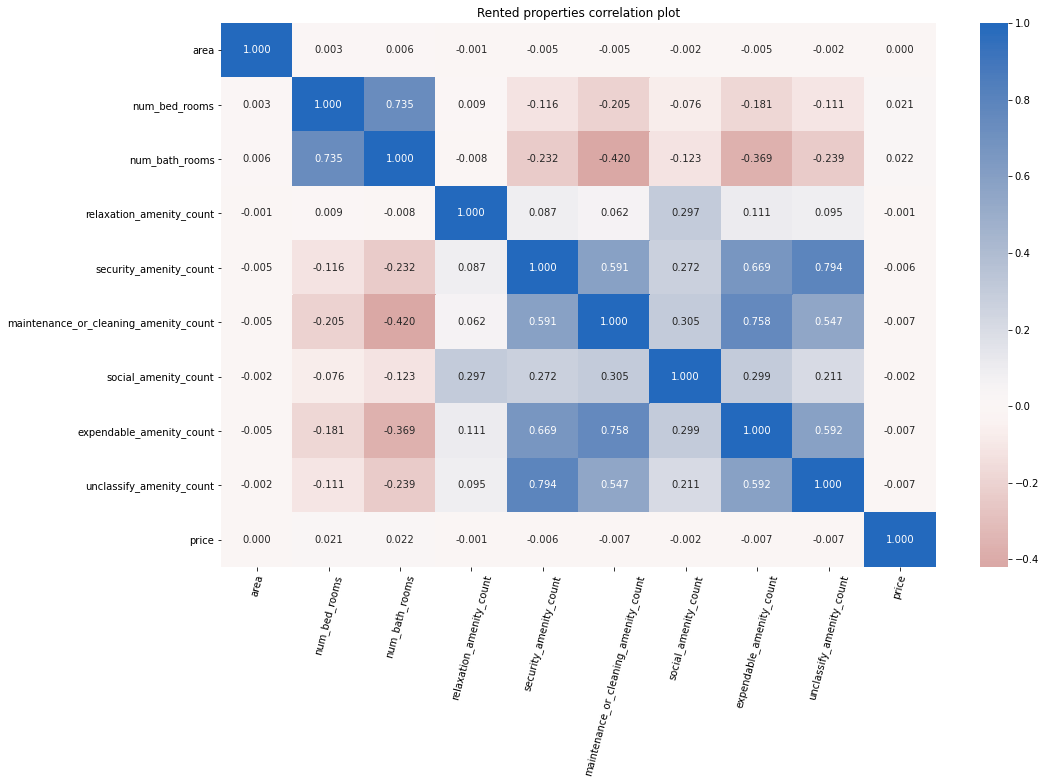

In [72]:
# Correlation plot for the sub-dataset: rent
plt.figure(figsize = [16, 10])
sb.heatmap(rent_df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "vlag_r", center = 0)
#plt.show()

plt.title("Rented properties correlation plot")

plt.xticks(rotation=75);

The above plot allow us to confirm that there is no linear correlation between the price and the area for rented properties.        
Furthermore, we can also observe that there is no correlation of the `*_amenity_count` variables on the price.

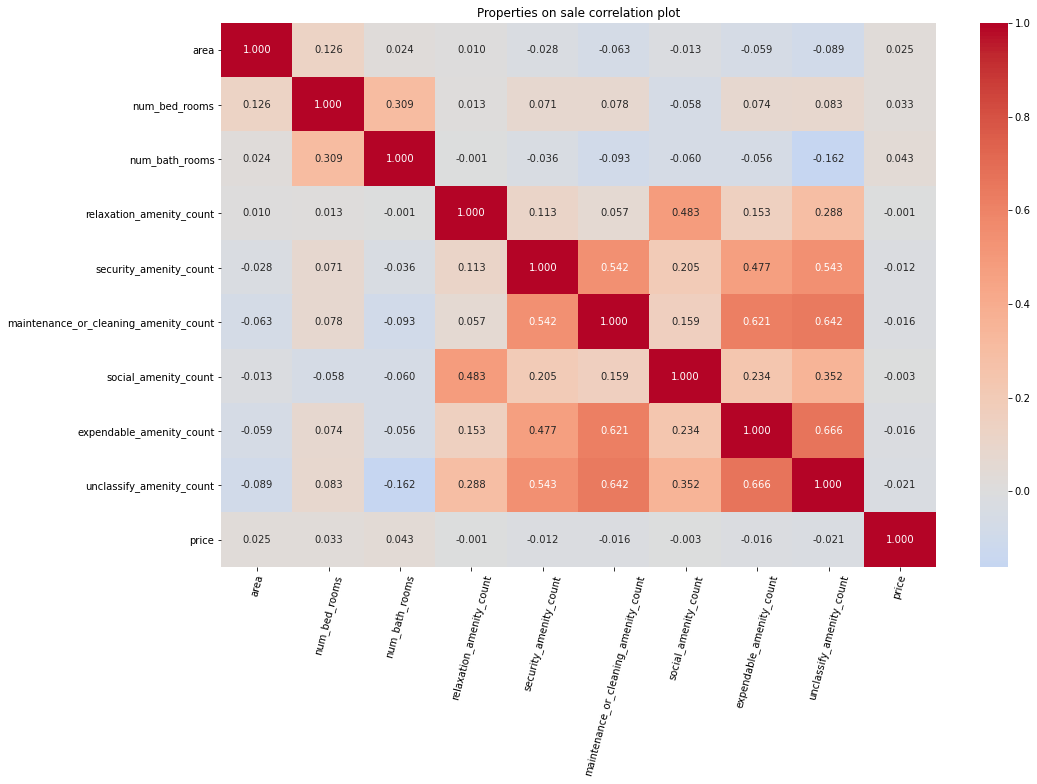

In [73]:
# Correlation plot for the sub-dataset: sale
plt.figure(figsize = [16, 10])
sb.heatmap(sale_df[numerical_vars].corr(), annot = True, fmt = ".3f", cmap = "coolwarm", center = 0)
#plt.show()

plt.title("Properties on sale correlation plot")

plt.xticks(rotation=75);

Here also, we can't also see any linear correlation between price and the `*_amenity_count` variables


<span id="prices-vs-amenities-interpretation"></span>

Surprisingly, there doesn't seem to be a (linear) relationship between the prices and the number of amenities when those amenities are grouped in categories. 



<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="amenities--vs--residential-properties"></span>


[EDA](#eda)  
### 13. Which amenities are the more frequent in Residential properties ?

This question was explored by Group 03.

In [74]:
# Extract residential properties
residential_df = df[df["building_nature"]=="Residential"]
residential_df.shape

(27220, 22)

In [75]:
res_amenities_frequencies = residential_df[amenities_vars].mean().sort_values(ascending=False)
res_amenities_frequencies

unclassify_amenity_count                 1.746767
expendable_amenity_count                 1.142873
maintenance_or_cleaning_amenity_count    0.751359
security_amenity_count                   0.471749
social_amenity_count                     0.060801
service_staff_amenity_count              0.025312
relaxation_amenity_count                 0.014989
dtype: float64

In [76]:
# Round the amenities frequencies
res_amenities_frequencies = np.round(res_amenities_frequencies)
res_amenities_frequencies

unclassify_amenity_count                 2.0
expendable_amenity_count                 1.0
maintenance_or_cleaning_amenity_count    1.0
security_amenity_count                   0.0
social_amenity_count                     0.0
service_staff_amenity_count              0.0
relaxation_amenity_count                 0.0
dtype: float64

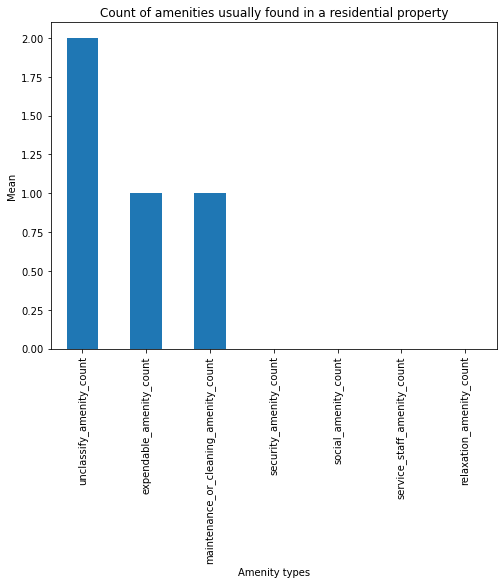

In [77]:
res_amenities_frequencies.plot(kind="bar", figsize=(8,6))


plt.xlabel("Amenity types")
plt.ylabel("Mean")
plt.title("Count of amenities usually found in a residential property");

<span id="amenities--vs--residential-properties-interpretation"></span>

In residential properties, we usually found 01 expendable amenity and 01 maintenance/cleaning amenity. As for other type of amenities, they are rarely found.


<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="amenities--vs--commercial-properties"></span>

[EDA](#eda)  
### 14. Which amenities are the more frequent in Commercial properties ?

This question was explored by Group 03.

In [78]:
# Extract commercial properties
commercial_df= df[df["building_nature"]=="Commercial"]
commercial_df.shape

(6481, 22)

In [79]:
com_amenities_frequencies = commercial_df[amenities_vars].mean().sort_values(ascending=False)
com_amenities_frequencies

unclassify_amenity_count                 2.079463
expendable_amenity_count                 1.382811
maintenance_or_cleaning_amenity_count    0.903256
security_amenity_count                   0.600216
social_amenity_count                     0.162321
relaxation_amenity_count                 0.009258
service_staff_amenity_count              0.004320
dtype: float64

In [80]:
# Round the amenities frequencies
com_amenities_frequencies = np.round(com_amenities_frequencies)
com_amenities_frequencies

unclassify_amenity_count                 2.0
expendable_amenity_count                 1.0
maintenance_or_cleaning_amenity_count    1.0
security_amenity_count                   1.0
social_amenity_count                     0.0
relaxation_amenity_count                 0.0
service_staff_amenity_count              0.0
dtype: float64

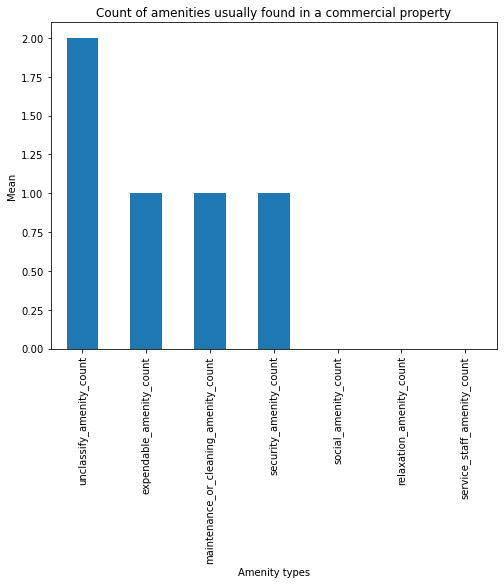

In [81]:
com_amenities_frequencies.plot(kind="bar", figsize=(8,6))


plt.xlabel("Amenity types")
plt.ylabel("Mean")
plt.title("Count of amenities usually found in a commercial property");

<span id="amenities--vs--commercial-properties-interpretation"></span>

In commercial properties, we usually found 01 expendable amenity, 01 maintenance/cleaning amenity, and 01 security amenity. Other types of amenities are rarely found.

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="property-density-variation"></span>

[EDA](#eda)  
### 15. How does the available properties density vary across the country ?
We had explored the [distribution of properties per city](#properties-vs-cities). Now, we want to analyzes how those properties are distributed(concentrated) over different place accorss Bangladesh, as a high density place should mean high density population, which in turn should mean higher prices compared to other places.    
This question was explored by Group 05.

We are going to order the cities in the dataset according to their properties count (in order to have the same ordering in all our plot)

In [82]:
# Recalling the content of our properties count per city
properties_per_city[:6], properties_per_city.size

(Dhaka               28681
 Chattogram           3481
 Narayanganj City      441
 Barishal              352
 Gazipur               323
 Rangpur                73
 Name: city, dtype: int64,
 44)

In [83]:
# Retrieve the cities ordered according to their properties count
ordered_cities = properties_per_city.sort_values(ascending=False).index.to_list()
ordered_cities[:6]

['Dhaka', 'Chattogram', 'Narayanganj City', 'Barishal', 'Gazipur', 'Rangpur']

In [84]:
# Setting order in our city variable
ordered_cities_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_cities)
df["city"] = df["city"].astype(ordered_cities_variable)
df["city"].dtypes

CategoricalDtype(categories=['Dhaka', 'Chattogram', 'Narayanganj City', 'Barishal',
                  'Gazipur', 'Rangpur', 'Dinajpur', 'Sylhet', 'Rajshahi',
                  'Narayanganj', 'Khulna', 'Thakurgaon', 'Bogura',
                  'Mymensingh', 'Cumilla', 'Manikganj', 'Barguna', 'Magura',
                  'Narsingdi', 'Chittagong', 'Kushtia', 'Jashore', 'Chandpur',
                  'Madaripur', 'Noakhali', 'Tangail', 'Brahmanbaria',
                  'Nilphamari', 'Moulvibazar', 'Kishoreganj', 'Sherpur',
                  'Lakshmipur', 'Naogaon', 'Sirajganj', 'Joypurhat',
                  'Jamalpur', 'Faridpur', 'Shariatpur', 'Nawabganj',
                  'Bandarban', 'Feni', 'Gopalganj', 'Habiganj', 'Gaibandha'],
, ordered=True)

Now we are going to compute again the total properties count per city (in order to have our count ordered by cities)

In [85]:
properties_count_per_city = df["city"].value_counts().sort_index()
properties_count_per_city[:5]

Dhaka               28681
Chattogram           3481
Narayanganj City      441
Barishal              352
Gazipur               323
Name: city, dtype: int64

Now let's compute the total area of the properties per city

In [86]:
total_property_area_per_city = df[ ["city","area"] ].groupby("city").sum() \
                                                    .reset_index()
total_property_area_per_city[:5]

,city,area
0,Dhaka,99337494.8
1,Chattogram,6511583.8
2,Narayanganj City,1293154.6
3,Barishal,286617.0
4,Gazipur,1445576.0


In [92]:
# Creating new df
city_stats_df= pd.DataFrame()

# Inserting into new df statistical data for each city
city_stats_df["city"] = total_property_area_per_city["city"]
city_stats_df["properties_count"] = properties_count_per_city.values
city_stats_df["properties_area"] = total_property_area_per_city["area"]

# Compute density of available properties per city
city_stats_df["properties_density"] = city_stats_df["properties_area"] / city_stats_df["properties_count"] 
city_stats_df.head()

,city,properties_count,properties_area,properties_density
0,Dhaka,28681,99337494.8,3463.529682
1,Chattogram,3481,6511583.8,1870.607239
2,Narayanganj City,441,1293154.6,2932.323356
3,Barishal,352,286617.0,814.252841
4,Gazipur,323,1445576.0,4475.467492


Now that we have the density per city, let's plot it to gain more informations.


**TODO**: According to my search on google, population density should be "population count divided by total area", but here we did "total area divided by properties count". make sure with the collaborator if it is right, or if there is some error.

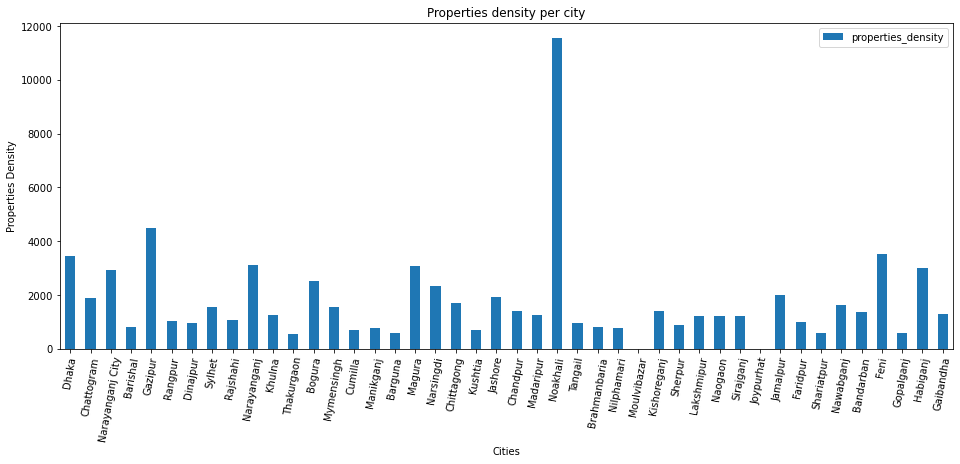

In [93]:
# Plotting properties count per cities
city_stats_df.plot(kind="bar", x="city", y="properties_density", figsize=(16,6))

plt.xticks(rotation=80)

plt.xlabel("Cities")
plt.ylabel("Properties Density")
plt.title("Properties density per city");

<span id="property-density-variation-interpretation"></span>

<!-- A bit more than 80% of our properties are concentrated on Dhaka, while 10%are in Chattogram. The rest is distributed over the other cities. This can mean one of two things:
* There are not much properties on sale/rent other than Dhaka and Chattogram.
* The websites we scrapped don't have data on cities other than Dhaka and Chattogram.     

This should be investigated in order to know if it is worth it to search for data related to other cities, or if we should focus our model delevelopment task only on Dhaka and Chattogram.    -->

`Noakali` has the highest density. According to our density formula (total area / total count), it means that city has a big area for small properties on sale/rent.
`Noakali` put aside, cities standing out with the highest density are `Gazipur, Dhaka, Narayangani, Feni, Habiganj`.

**TODO:** Complete plot interpretation (include other cities case in the interpretation).

Another thing we should be interested on is to correlate the density of properties over cities to the mean prices over those same cities That question was explored [here](#property-density-variation--vs--price-variation).

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

<span id="property-density-variation--vs--price-variation"></span>

[EDA](#eda)  
### 16. How does the density of available properties influence the price ?
We want to explore how the [available properties density variation across the country](#property-density-variation) is related to price variation over those same places.    
This question was also explored by Group 05.

Since our cities are ordered according to their properties count, let's observe their mean price per purpose (rent/sale).

In [102]:
# Mean price per building type
mean_price_per_city = df[ ["city","purpose","price"] ].groupby(["city","purpose"], as_index=False) \
                                                               .mean()

mean_price_per_city.rename(columns={
    "price":"mean_price"
}, inplace=True)

mean_price_per_city

,city,purpose,mean_price
0,Dhaka,Rent,1.105220e+07
1,Dhaka,Sale,3.492284e+09
2,Chattogram,Rent,1.155083e+05
3,Chattogram,Sale,1.022728e+07
4,Narayanganj City,Rent,7.500000e+05
...,...,...,...
83,Gopalganj,Sale,NaN
84,Habiganj,Rent,NaN
85,Habiganj,Sale,1.189800e+07
86,Gaibandha,Rent,8.000000e+03


In [104]:
# Computing the stats of the cities based on purpose
city_stats_per_purpose_df= city_stats_df.merge(mean_price_per_city, how="left",left_on="city",right_on="city")
city_stats_per_purpose_df.head()

,city,properties_count,properties_area,properties_density,purpose,mean_price
0,Dhaka,28681,99337494.8,3463.529682,Rent,1.105220e+07
1,Dhaka,28681,99337494.8,3463.529682,Sale,3.492284e+09
2,Chattogram,3481,6511583.8,1870.607239,Rent,1.155083e+05
3,Chattogram,3481,6511583.8,1870.607239,Sale,1.022728e+07
4,Narayanganj City,441,1293154.6,2932.323356,Rent,7.500000e+05


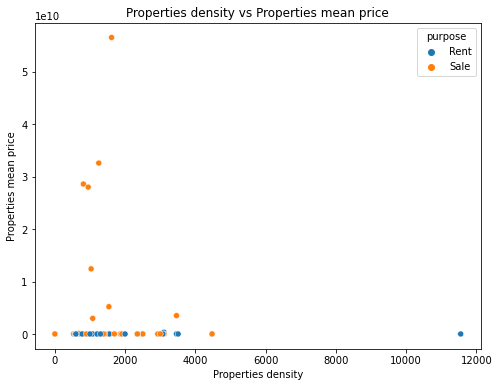

In [106]:
# Plotting Properties density vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_density",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties density")
plt.ylabel("Properties mean price")
plt.title("Properties density vs Properties mean price");

There doesn't seem to be a linear relationship between "cities density" and "properties mean price by city".

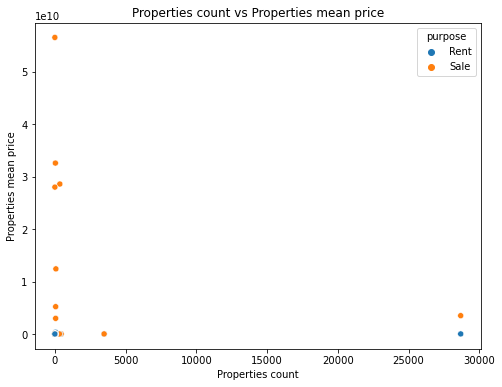

In [108]:
# Properties count vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_count",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties count")
plt.ylabel("Properties mean price")
plt.title("Properties count vs Properties mean price");

We can see that there is no linear relationship between the number of properties in a city and its trending prices.

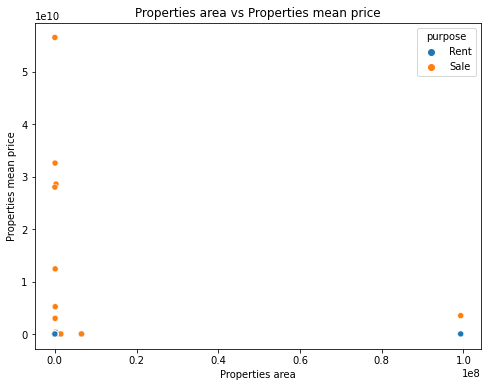

In [109]:
# Properties area vs Properties mean price
plt.figure(figsize=[8,6])
sb.scatterplot(data=city_stats_per_purpose_df, x="properties_area",y="mean_price", hue="purpose")

# plt.xlim(-100, 10000)
# plt.ylim(-.5*1e11, .2*1e12)

plt.xlabel("Properties area")
plt.ylabel("Properties mean price")
plt.title("Properties area vs Properties mean price");

Once again, we observe no linear relationship between the total properties area in a city and its trending prices.

<span id="property-density-variation--vs--price-variation--interpretation"></span>


There is no linear relationship between the density of properties in a given city, and its trending prices. Combined to the fact that we see no linear relationship between "city mean prices and its properties' count" and "city mean prices and its total's area", we need to confirm if there is something wrong with our data or with our analysis, or if real-estate market is chaotic in Bangladesh.

<br/>

💡 The above plot, as well as its interpretation, will be put in our explanatory analysis (or in our presention).

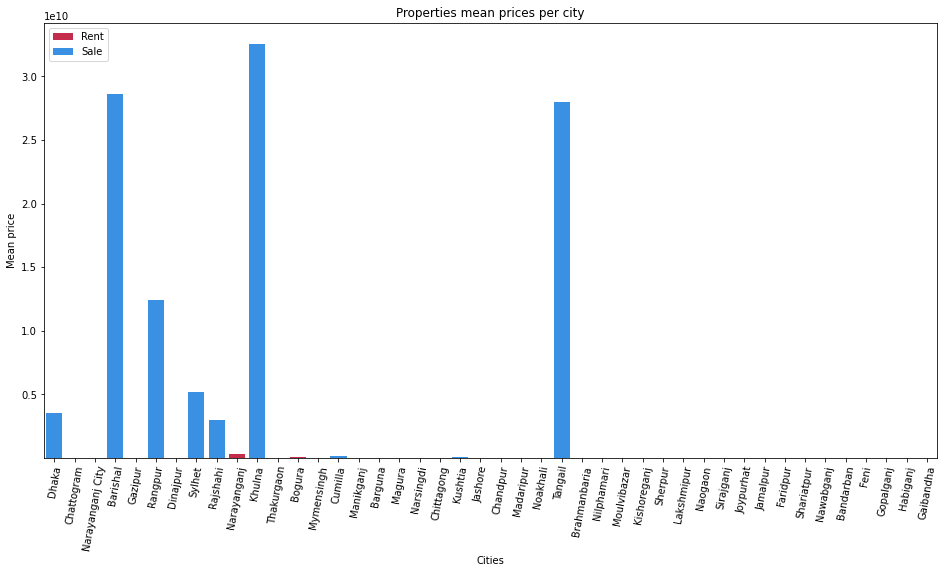

In [90]:
mean_price_per_city__rent = mean_price_per_city[ mean_price_per_city["purpose"]=="Rent" ]
mean_price_per_city__sale = mean_price_per_city[ mean_price_per_city["purpose"]=="Sale" ]

plt.figure(figsize=[16,8])

ax = sb.barplot(data=mean_price_per_city__rent, x="city", y="price", color='crimson', label="Rent")
sb.barplot(data=mean_price_per_city__sale, x="city", y="price", bottom=mean_price_per_city__rent["price"], 
           color='dodgerblue',label="Sale", ax=ax)

plt.xticks(rotation=80)

ax.legend()

plt.xlabel("Cities")
plt.ylabel("Mean price")
plt.title("Properties mean prices per city");

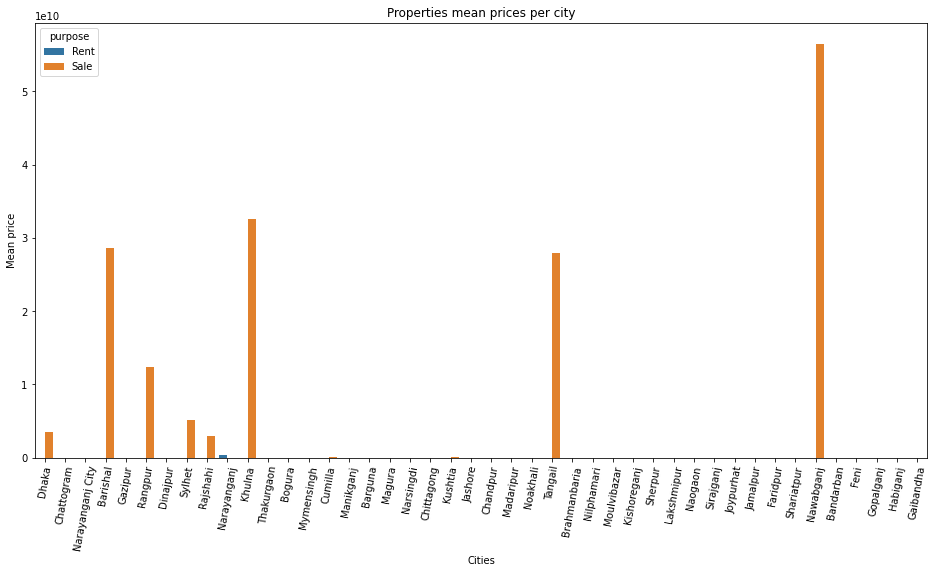

In [91]:
plt.figure(figsize=[16,8])

sb.barplot(data=mean_price_per_city, x="city",y="price", hue="purpose")

plt.xticks(rotation=80)

ax.legend()

plt.xlabel("Cities")
plt.ylabel("Mean price")
plt.title("Properties mean prices per city");

<div id="conclusion"></div>

[TOC](#intro)  
## Conclusions

TODO: provide summary of findings and recommendations here.


When doing the work, we encountered some limitations:
* TODO: provide limitations.